# Avocado Project

# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


#Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.

#Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
# Importing important library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("avocado.csv")
df.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# EDA

## Static Analysis

In [3]:
# checking the shape 
df.shape

(18249, 14)

We have 18249  rows and 13 columns and 13 are features and AveragePrice is label for regression and region is label for classification 

In [4]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are int, object and float data type in the dataset. Memory usage: 1.9+ MB

In [6]:
df.nunique().to_frame()

0
Unnamed: 0       53
Date            169
AveragePrice    259
Total Volume  18237
4046          17702
4225          18103
4770          12071
Total Bags    18097
Small Bags    17321
Large Bags    15082
XLarge Bags    5588
type              2
year              4
region           54

Unnamed: 0  have 53 unique values and is of no use and type,year and region have categorical data and other are continues values.

In [7]:
duplicates = df.duplicated()
print('Number of duplicate rows:', duplicates.sum())

Number of duplicate rows: 0


We don't have any duplicate in the dataset.

In [8]:
# dropping the unnamed callem as it is 0-52 index repeating and not provide any information
df.drop('Unnamed: 0',axis=1,inplace=True)


In [9]:
# Again checking the shape
df.shape

(18249, 13)

## Feature Engineering

In [10]:
# Converting data type from object to datefromate
df['Date'] = pd.to_datetime(df['Date'])

Converting the Object data type to datetime.

In [11]:
# Checking the datatype
df['Date'].dtype

dtype('<M8[ns]')

In [12]:
# Making new date and month column 
df['Month']=df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.shape

(18249, 15)

We are extracting Week and month from Date as year is already given.

In [13]:
df['Week'] = df['Week'].astype('int64')

Converting the Uint64 data type to Integer.

In [14]:
# Droping the original Date column as we already have day month and year
df.drop('Date',axis=1, inplace=True)

Dropping the date column

In [15]:
# Checking the shape
df.shape

(18249, 14)

In [16]:
# Defining a function to classify the regions into 'East' and 'West' as gerographucally we can categorise all reagion into 2 categories
'''
def classify_region(region):
    east_regions = ['Albany', 'BaltimoreWashington', 'Boston', 'BuffaloRochester', 'HarrisburgScranton',
                    'HartfordSpringfield', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Philadelphia',
                    'Pittsburgh', 'RichmondNorfolk', 'Syracuse']

    if region in east_regions:
        return 'East'
    else:
        return 'West'

# reasigning the region with updated values
df['region'] = df['region'].apply(classify_region)

'''

"\ndef classify_region(region):\n    east_regions = ['Albany', 'BaltimoreWashington', 'Boston', 'BuffaloRochester', 'HarrisburgScranton',\n                    'HartfordSpringfield', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Philadelphia',\n                    'Pittsburgh', 'RichmondNorfolk', 'Syracuse']\n\n    if region in east_regions:\n        return 'East'\n    else:\n        return 'West'\n\n# reasigning the region with updated values\ndf['region'] = df['region'].apply(classify_region)\n\n"

Making new feature from existing features

In [18]:
# making new feature from the exsisting fearures as cross validation score without it was not accpetable so we need to add 
# feature which are more correlated to lable
df['AvgPrice5Weeks'] = df['AveragePrice'].rolling(window=5).mean()
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  \
0     8603.62       93.25          0.0  conventional  2015  Albany     12   
1     9408.07       97.49          0.0  conventional  2015  Albany     12   
2     8042.21      103.14          0.0  conventional  2015  Albany     12   
3     5677.40      133.76          0.0  conventional  2015  Albany     12   
4     5986.26      197.69          0.0  conventional  2015  Albany     11   

   Week  AvgPrice5Weeks  
0    52             NaN  
1    51             NaN  
2    50             NaN  
3    49             NaN  
4    48           1.194

In [19]:
df.dropna(inplace=True)

Dropping the null values.

In [20]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18245.000000  1.824500e+04  1.824500e+04  1.824500e+04  1.824500e+04   
mean       1.406030  8.508132e+05  2.930725e+05  2.952039e+05  2.284473e+04   
std        0.402697  3.453905e+06  1.265120e+06  1.204248e+06  1.074753e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083576e+04  8.546300e+02  3.007870e+03  0.000000e+00   
50%        1.370000  1.074312e+05  8.658160e+03  2.905471e+04  1.851100e+02   
75%        1.660000  4.331523e+05  1.110548e+05  1.502611e+05  6.244220e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824500e+04  1.824500e+04  1.824500e+04   18245.000000  18245.000000   
mean   2.396900e+05  1.822329e+05  5.434998e+04    3107.107554   2016.148150   
std    9.863445e+05  7.462558e+05  2.439914e+05   17694.774333      0.939888   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.083400e+03  2.847480e+03  1.280000e+02       0.000000   2015.000000   
50%    3.976849e+04  2.637958e+04  2.649830e+03       0.000000   2016.000000   
75%    1.107893e+05  8.333789e+04  2.203831e+04     133.170000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month          Week  AvgPrice5Weeks  
count  18245.000000  18245.000000    18245.000000  
mean       6.175939     25.229926        1.405957  
std        3.533465     15.481111        0.380760  
min        1.000000      1.000000        0.530000  
25%        3.000000     11.000000        1.110000  
50%        6.000000     25.000000        1.370000  
75%        9.000000     39.000000        1.654000  
max       12.000000     53.000000        3.046000

From description:-

1.All column have 18249 values so no missing value present.

2.The std is more than 10 % of mean there might be outliers

- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags

3.All the minimum value are value and possible

4.The difference between min,25%,50%,75% and max is not normal.

- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags

5.The mean value is greater than the median (50%) which means the data is skewed to right in these column.

- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags

Note:- We only analysis continues variable not the categorical one

## Graphical Analysis

### Univarient Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

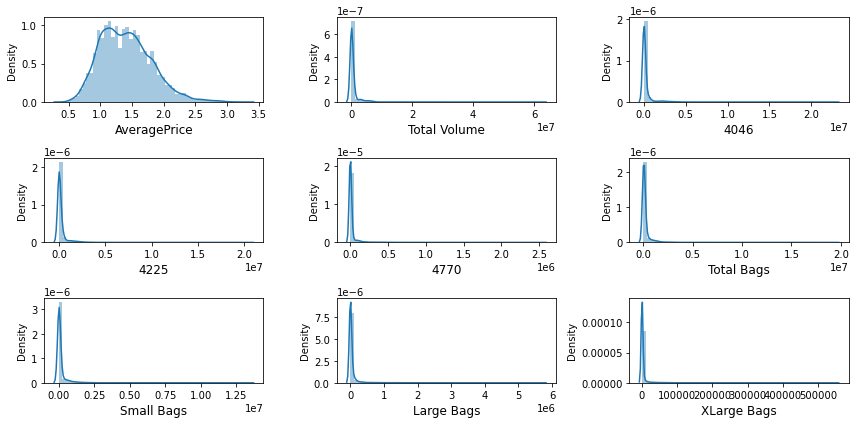

In [195]:
# Cretaing loop for finding the distribution of continuies values
plt.figure(figsize=(12,6),facecolor="white")
plotnumber=1
for col in df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

data is skewed toward right for

- Total Volume
- 4046
- 4225
- 4770
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags




organic         9123
conventional    9122
Name: type, dtype: int64


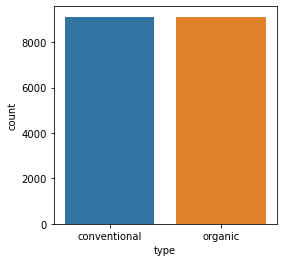

In [40]:
# checking the count for catagorical values
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='type', data=df)

# Get the count values for each category
value_counts = df['type'].value_counts()
print(value_counts)

Almost same for both organic and conventional 

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


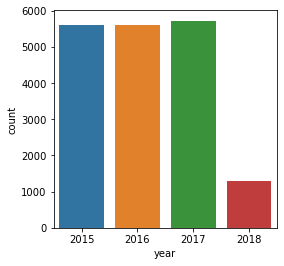

In [197]:
# checking the count for catagorical values
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='year', data=df)

# Get the count values for each category
value_counts = df['year'].value_counts()
print(value_counts)

Year 2017 has  the highest and 2018 least values

West count is very high compare to East

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


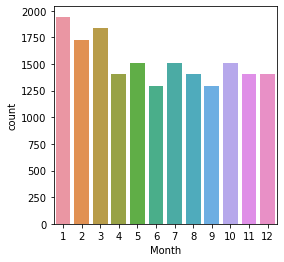

In [24]:
# checking the count for catagorical values
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Month', data=df)

# Get the count values for each category
value_counts = df['Month'].value_counts()
print(value_counts)

Month 1 has the highest and month 6 have the lowest count

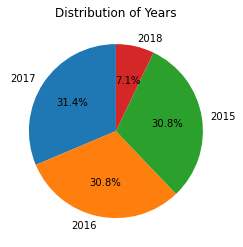

In [34]:
year_counts = df['year'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

From the above graph we can see 31.4% is hare for 2017 which is highest

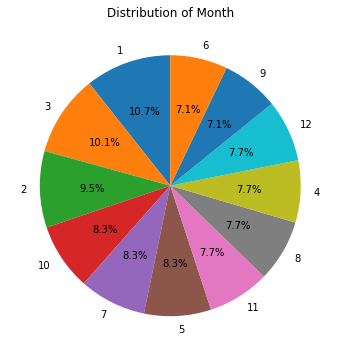

In [39]:
Month_counts = df['Month'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(Month_counts, labels=Month_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Month')
plt.show()

First month have the highest no. of values compare to others so we can state that first 3 month have high availability of avacado, It can be the time of harvesting

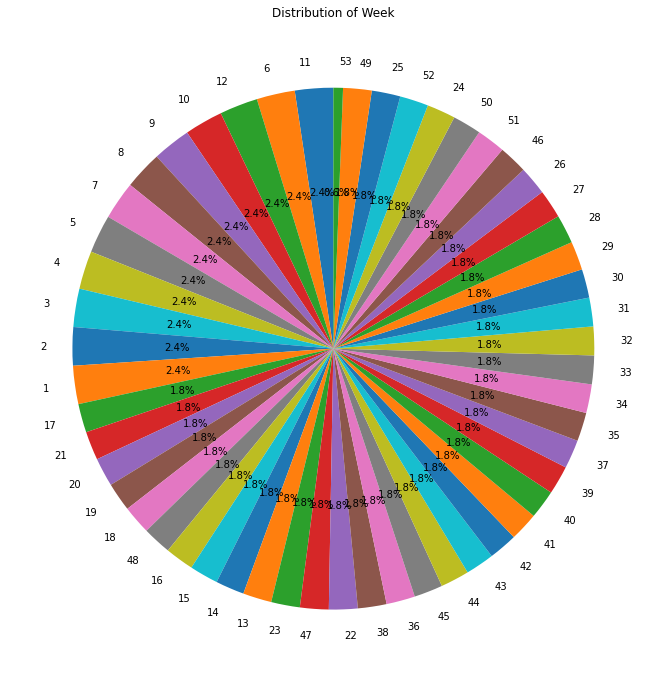

In [38]:
week_counts = df['Week'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 12))
plt.pie(week_counts, labels=week_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Week')
plt.show()

from the above graph we can see the share is high for 1 to 12 week 

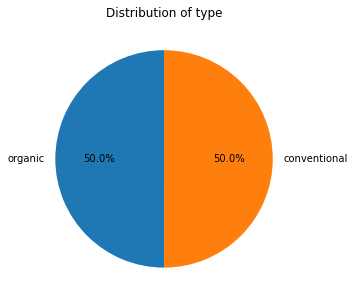

In [44]:
type_counts = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of type')
plt.show()

From the above graph we can see that the organic and conventional have same distribution

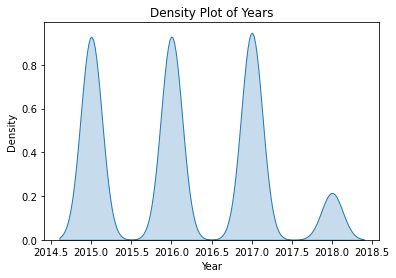

In [46]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='year', fill=True)
plt.title('Density Plot of Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

From the above graph we can see density is less for 2018

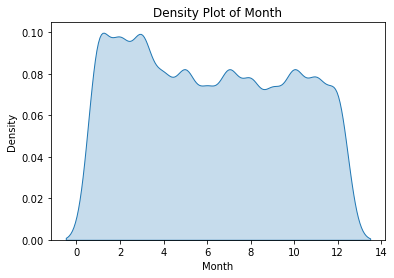

In [47]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Month', fill=True)
plt.title('Density Plot of Month')
plt.xlabel('Month')
plt.ylabel('Density')
plt.show()

From the above graph we can see that density is more for early Month of the years

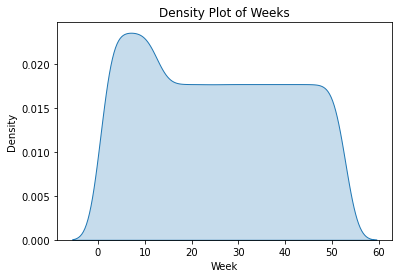

In [48]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Week', fill=True)
plt.title('Density Plot of Weeks')
plt.xlabel('Week')
plt.ylabel('Density')
plt.show()

From the above graph we can see that density is more for early weeks of the years

### Bi-variant analysis

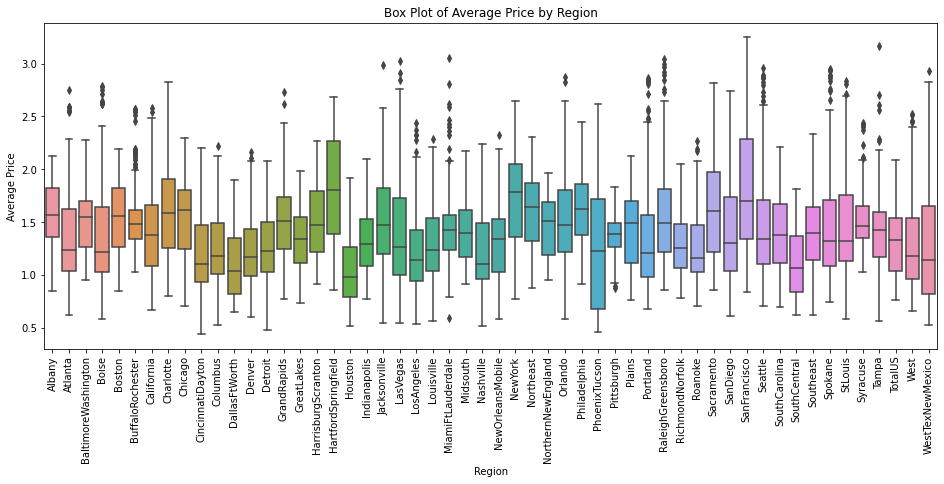

In [51]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.title('Box Plot of Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

We can see there are some outliers in the Regions

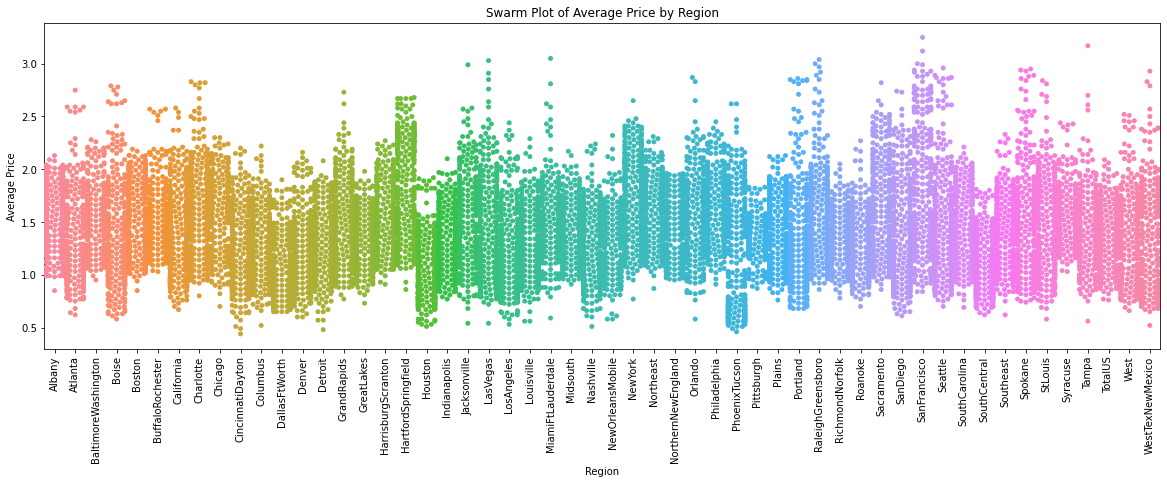

In [55]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.title('Swarm Plot of Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()


From the above graph we can see the above price distribution and highest and lowest price as well as density of average price is highest for high value.
- Sanfrancisco have highest average price
- southcentral have low range of average price comparitively
- phoenixTucson have highest density for low average price

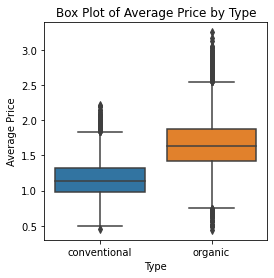

In [56]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Box Plot of Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

We can see that Average price for Conventional is lower compare to organic, and have outliers

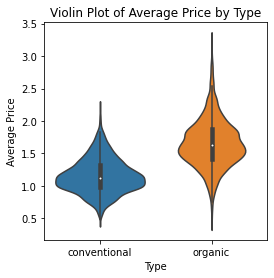

In [57]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='type', y='AveragePrice', data=df)
plt.title('Violin Plot of Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

We can see that average price for conventional is mostly 1-1.5 , where as average price for organic is mostly 1.5-2

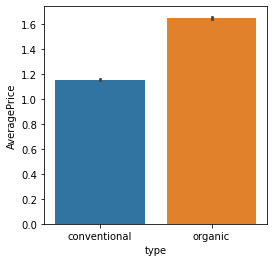

In [43]:
plt.figure(figsize=(4, 4))
ax = sns.barplot(x='type',y='AveragePrice',data=df)

Organic have higher average cost than Conventonal

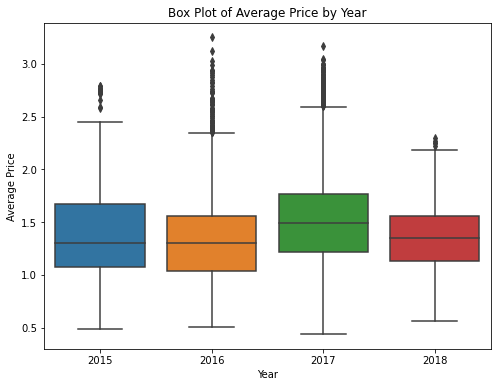

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='AveragePrice', data=df)
plt.title('Box Plot of Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

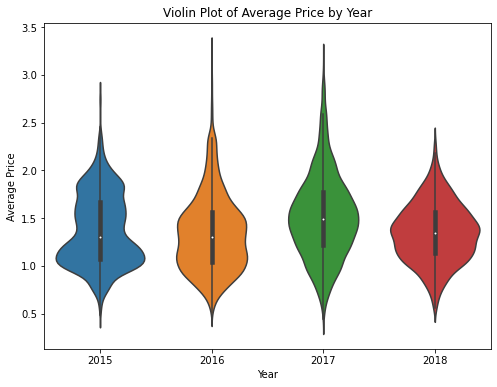

In [59]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='year', y='AveragePrice', data=df)
plt.title('Violin Plot of Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


Average price
- of 2015 is concentrated between (1-1.3)
- of 2016 is concentrated between (1-1.5)
- of 2015 is concentrated between (1.2-1.7)
- of 2015 is concentrated between (1.2-1.5)

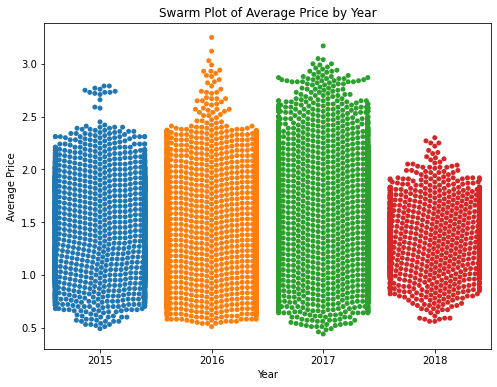

In [60]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='year', y='AveragePrice', data=df)
plt.title('Swarm Plot of Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


From the graph we can see that 2016 have highest average value.

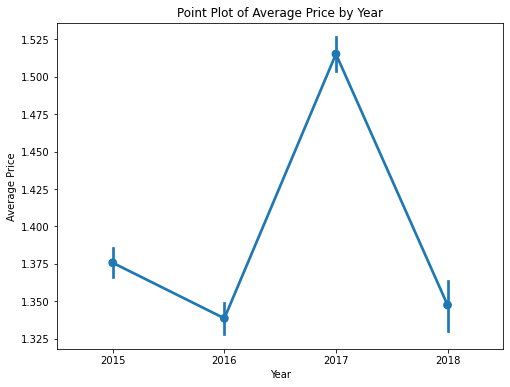

In [62]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='year', y='AveragePrice', data=df)
plt.title('Point Plot of Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

From above graph we can see that 2017 have highest average for average price

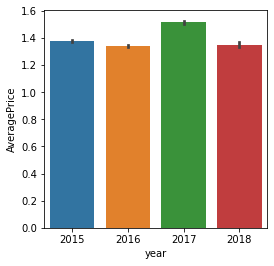

In [26]:
plt.figure(figsize=(4, 4))
ax = sns.barplot(x='year',y='AveragePrice',data=df)


2017 have highest avg price

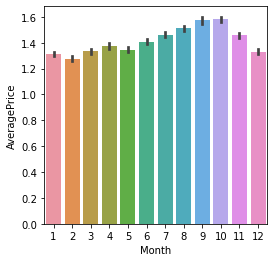

In [27]:
plt.figure(figsize=(4, 4))
ax = sns.barplot(x='Month',y='AveragePrice',data=df)


highest avg price is in 9 and 10 month and second half have high avg cost compare to first half.

<Figure size 576x576 with 0 Axes>

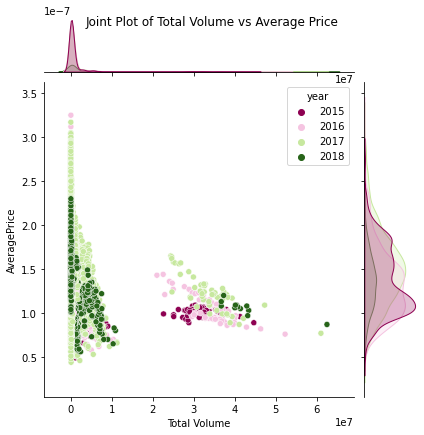

In [64]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='Total Volume', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of Total Volume vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-7 for Total Volume and from 0.5-1 for average price 

<Figure size 576x576 with 0 Axes>

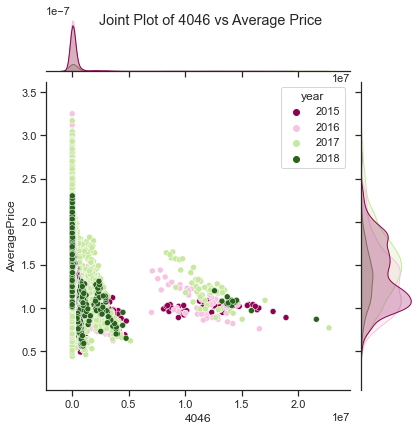

In [69]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='4046', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of 4046 vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-7 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

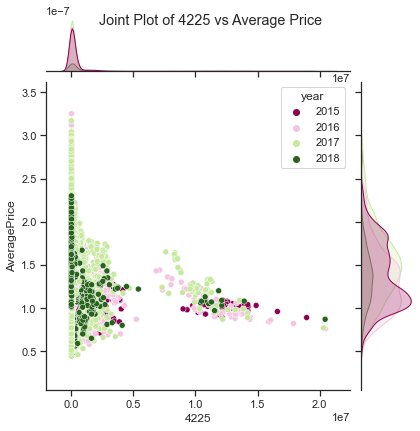

In [70]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='4225', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of 4225 vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-7 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

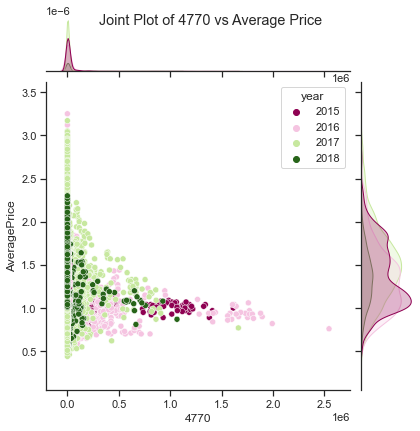

In [71]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='4770', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of 4770 vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-6 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

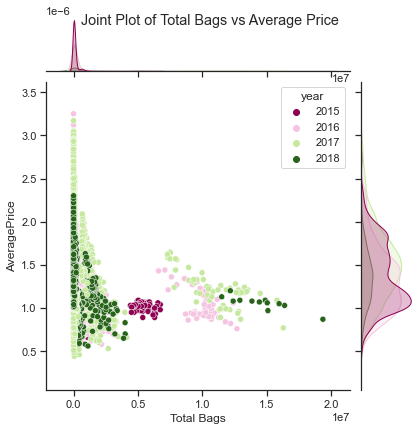

In [72]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='Total Bags', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of Total Bags vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-6 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

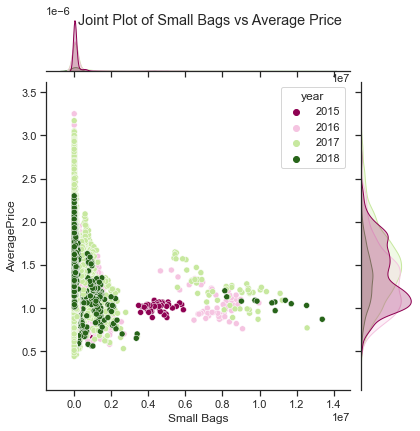

In [73]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='Small Bags', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of Small Bags vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-6 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

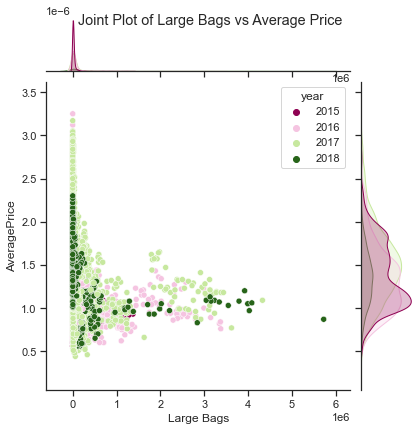

In [74]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='Large Bags', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of Large Bags vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-6 for Total Volume and from 0.5-1 for average price

<Figure size 576x576 with 0 Axes>

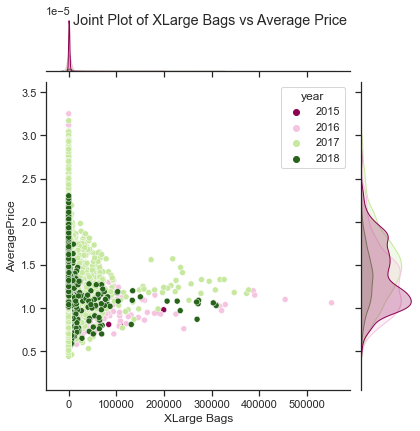

In [75]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='XLarge Bags', y='AveragePrice', data=df, hue='year', palette='PiYG')
plt.suptitle('Joint Plot of XLarge Bags vs Average Price')
plt.show()

From above graph we can see that value is concentrated at 1e-5 for Total Volume and from 0.5-1 for average price

Note:-**As  we  can notice the Bags have almost same distribution they might me correlated**

### Mutlivarient analysis

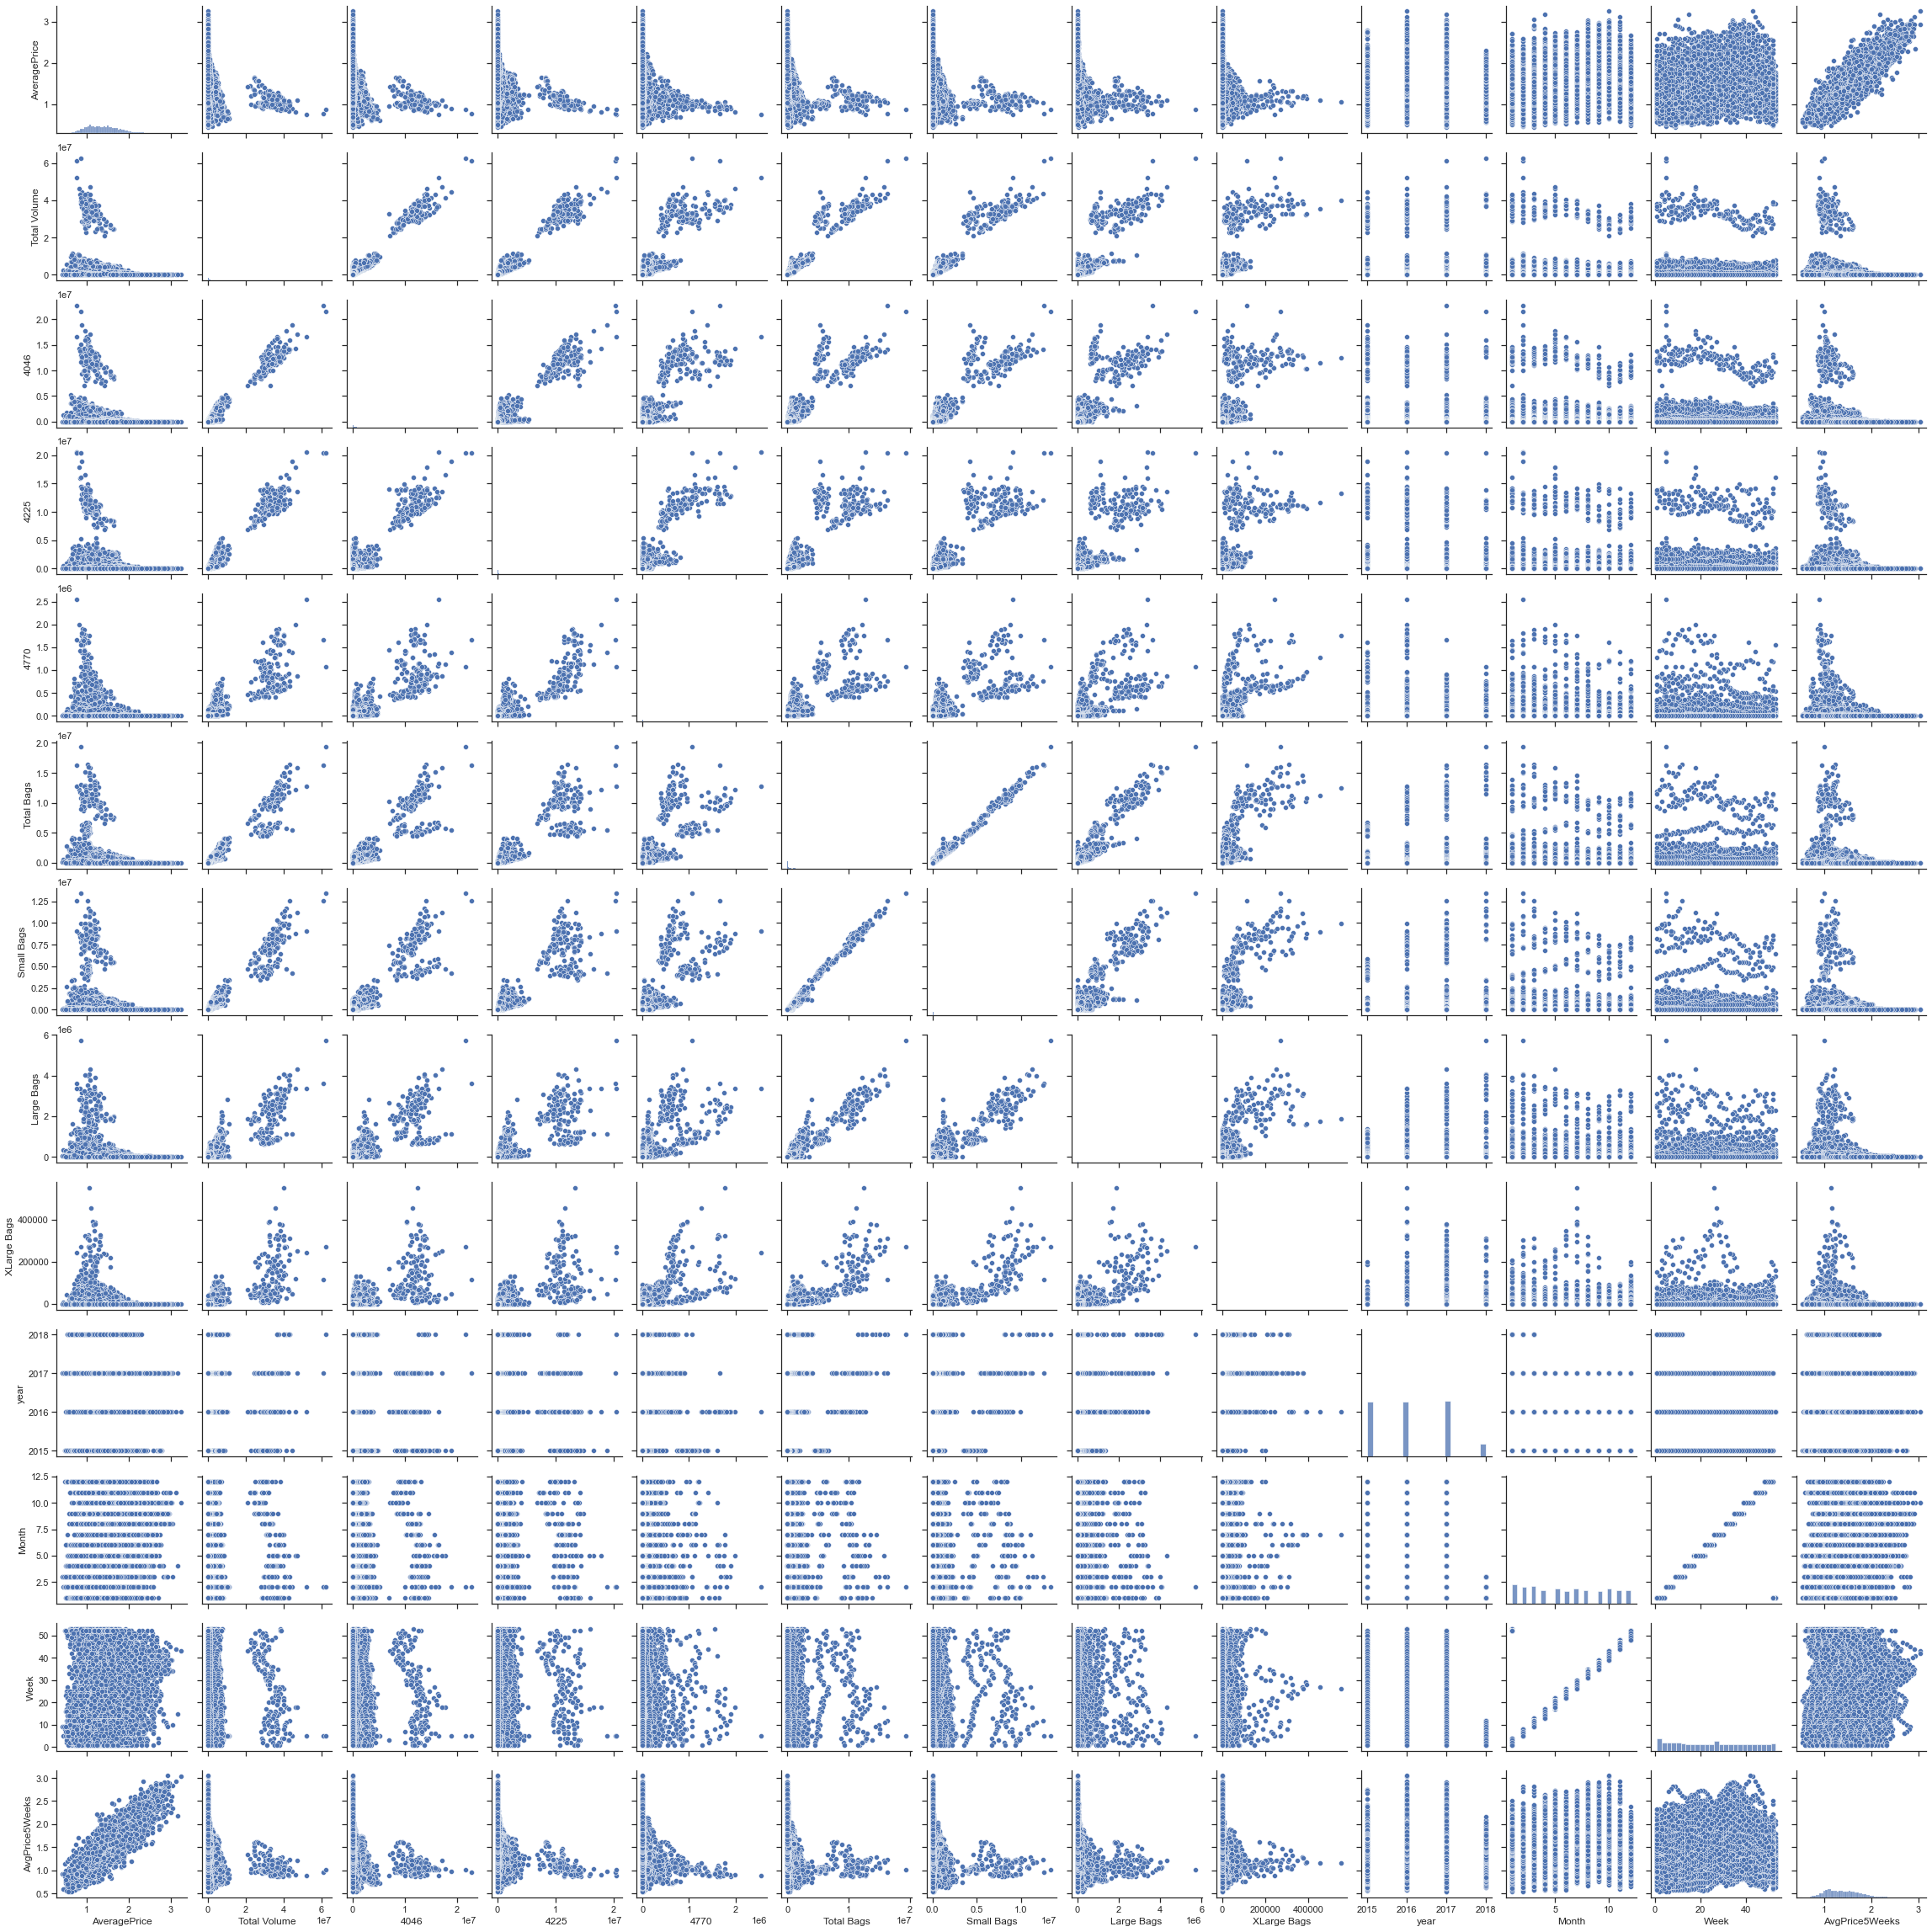

In [80]:
sns.pairplot(df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'Month', 'Week', 'AvgPrice5Weeks']])

There is string correlation between

- Total Volume and 4046
- Total Volume and 4225
- total volume have high correlation with most of the column
- Total bag and small bag are highly correlated

<Figure size 720x576 with 0 Axes>

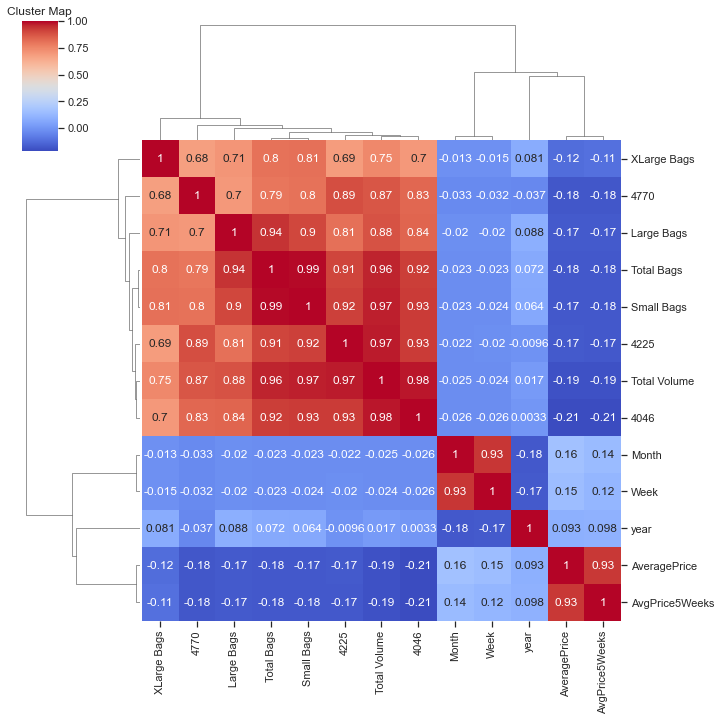

In [86]:
plt.figure(figsize=(10, 8))
sns.clustermap(df[columns_for_pairplot].corr(), annot=True, cmap='coolwarm')
plt.title('Cluster Map')
plt.show()


From the above graph we can see that 4046,4225,4770 are highky corelated Total bags, small bag, large bag and xlarge bags are higly correlated.

# Feature Engineering

## Checking the outliers

In [87]:
df2=df

In [88]:
df.isna().sum()

AveragePrice      0
Total Volume      0
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
Month             0
Week              0
AvgPrice5Weeks    0
dtype: int64

In [89]:
dfnum=df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]

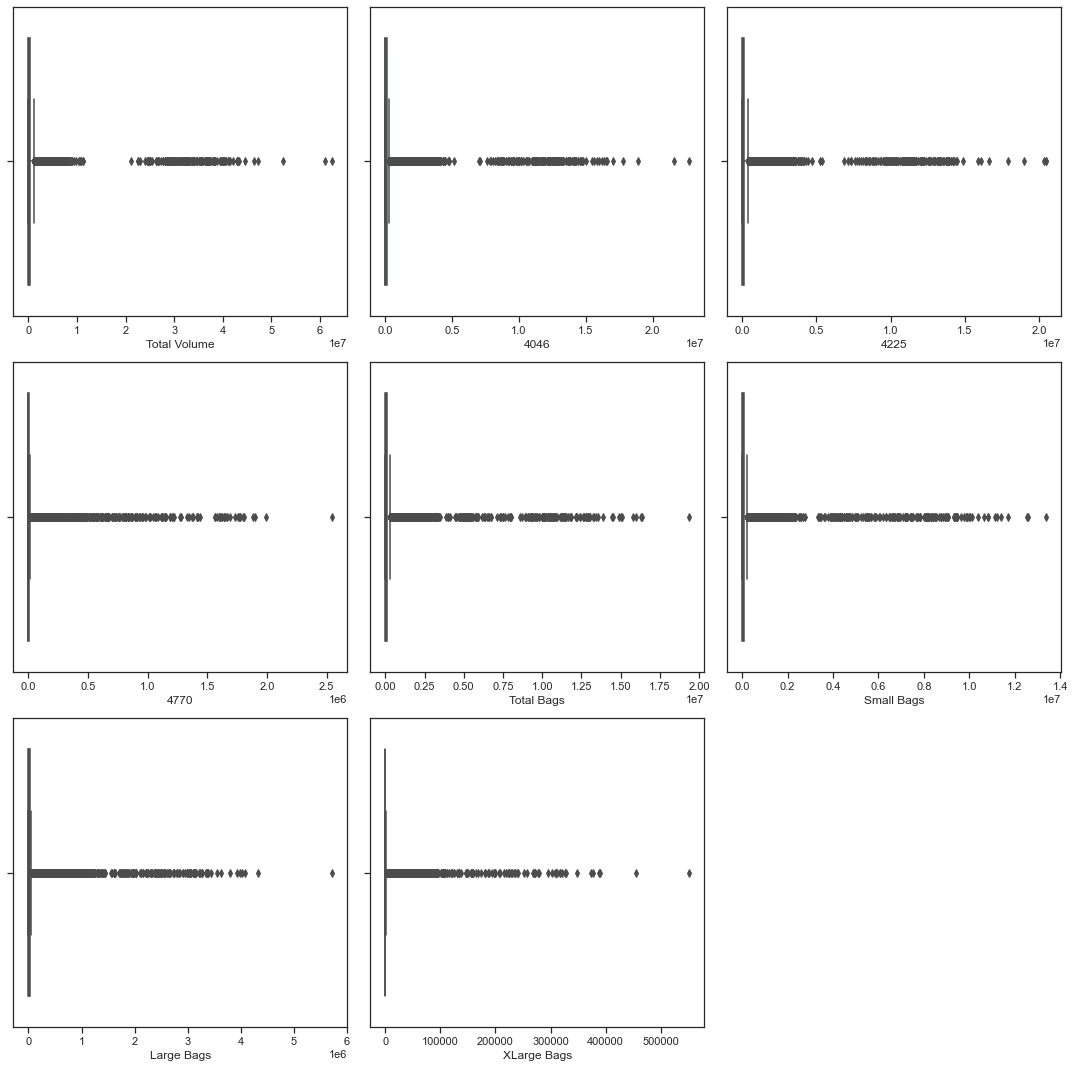

In [90]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for col in dfnum:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(dfnum[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

As found in statical analysis we have a lot of outliers in each of the columns

## Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [92]:
df4=lab_enc.fit_transform(df2['type'])
pd.Series(df4)
df2['type']=df4

In [93]:
df3=lab_enc.fit_transform(df2['region'])
pd.Series(df3)
df2['region']=df3

In [94]:
df2.head()

AveragePrice  Total Volume     4046       4225   4770  Total Bags  \
4          1.28      51039.60   941.48   43838.39  75.78     6183.95   
5          1.26      55979.78  1184.27   48067.99  43.61     6683.91   
6          0.99      83453.76  1368.92   73672.72  93.26     8318.86   
7          0.98     109428.33   703.75  101815.36  80.00     6829.22   
8          1.02      99811.42  1022.15   87315.57  85.34    11388.36   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Week  \
4     5986.26      197.69          0.0     0  2015       0     11    48   
5     6556.47      127.44          0.0     0  2015       0     11    47   
6     8196.81      122.05          0.0     0  2015       0     11    46   
7     6266.85      562.37          0.0     0  2015       0     11    45   
8    11104.53      283.83          0.0     0  2015       0     11    44   

   AvgPrice5Weeks  
4           1.194  
5           1.180  
6           1.108  
7           1.118  
8           1.106

### splitting the label and features

In [95]:
x=df2.drop('AveragePrice', axis=1)
y= df2.AveragePrice

## ZScore 

In [96]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(18245, 14)

In [97]:
Threshold = 2
outlier_indices = np.where(z > 2)[0]

In [98]:
x1 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(x1.shape)

(18245, 14)
(16641, 14)


Removing 1604 outliers from x and y both

In [99]:
percentagedataloss=(x.shape[0]-x1.shape[0])*100/x.shape[0]
percentagedataloss

8.791449712249932

In [100]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)


(16641,)


In [101]:
x=x1

In [102]:
df1=pd.concat([x,y],axis=1)
df1.shape

(16641, 15)

## Checking skewness

In [103]:
df1.skew()

Total Volume      3.963539
4046              5.114647
4225              4.652934
4770              4.986529
Total Bags        3.926151
Small Bags        4.199619
Large Bags        4.506331
XLarge Bags       6.045087
type             -0.043642
year              0.257219
region            0.020838
Month             0.108333
Week              0.107156
AvgPrice5Weeks    0.169191
AveragePrice      0.252938
dtype: float64

Skewness is high for almost each features

## Correlation

In [104]:
# checking the correlationbetween features and the target.
cor=df1.corr()
cor

Total Volume      4046      4225      4770  Total Bags  \
Total Volume        1.000000  0.858482  0.871886  0.590055    0.908785   
4046                0.858482  1.000000  0.536222  0.439608    0.703553   
4225                0.871886  0.536222  1.000000  0.573853    0.755565   
4770                0.590055  0.439608  0.573853  1.000000    0.469460   
Total Bags          0.908785  0.703553  0.755565  0.469460    1.000000   
Small Bags          0.896242  0.670805  0.775748  0.485604    0.973640   
Large Bags          0.613925  0.542669  0.421156  0.236508    0.713667   
XLarge Bags         0.465507  0.394788  0.337014  0.427996    0.509725   
type               -0.436300 -0.358725 -0.397551 -0.331402   -0.386213   
year                0.003135 -0.034570 -0.029045 -0.093870    0.115211   
region              0.065946  0.108816  0.000595 -0.098579    0.081231   
Month               0.018243  0.018443  0.011188 -0.005430    0.021222   
Week                0.017357  0.016168  0.013309 -0.003297    0.018187   
AvgPrice5Weeks     -0.337464 -0.348548 -0.235621 -0.251507   -0.297110   
AveragePrice       -0.323042 -0.332955 -0.225250 -0.237604   -0.286267   

                Small Bags  Large Bags  XLarge Bags      type      year  \
Total Volume      0.896242    0.613925     0.465507 -0.436300  0.003135   
4046              0.670805    0.542669     0.394788 -0.358725 -0.034570   
4225              0.775748    0.421156     0.337014 -0.397551 -0.029045   
4770              0.485604    0.236508     0.427996 -0.331402 -0.093870   
Total Bags        0.973640    0.713667     0.509725 -0.386213  0.115211   
Small Bags        1.000000    0.535585     0.527161 -0.372449  0.094428   
Large Bags        0.535585    1.000000     0.222107 -0.281388  0.133767   
XLarge Bags       0.527161    0.222107     1.000000 -0.274522  0.090821   
type             -0.372449   -0.281388    -0.274522  1.000000 -0.006694   
year              0.094428    0.133767     0.090821 -0.006694  1.000000   
region            0.066850    0.100458    -0.042652  0.021544 -0.008708   
Month             0.022799    0.007324     0.031711 -0.023869 -0.176573   
Week              0.020515    0.003275     0.027902 -0.021893 -0.170738   
AvgPrice5Weeks   -0.268093   -0.276366    -0.146969  0.645915  0.076408   
AveragePrice     -0.255052   -0.275880    -0.145319  0.598256  0.073691   

                  region     Month      Week  AvgPrice5Weeks  AveragePrice  
Total Volume    0.065946  0.018243  0.017357       -0.337464     -0.323042  
4046            0.108816  0.018443  0.016168       -0.348548     -0.332955  
4225            0.000595  0.011188  0.013309       -0.235621     -0.225250  
4770           -0.098579 -0.005430 -0.003297       -0.251507     -0.237604  
Total Bags      0.081231  0.021222  0.018187       -0.297110     -0.286267  
Small Bags      0.066850  0.022799  0.020515       -0.268093     -0.255052  
Large Bags      0.100458  0.007324  0.003275       -0.276366     -0.275880  
XLarge Bags    -0.042652  0.031711  0.027902       -0.146969     -0.145319  
type            0.021544 -0.023869 -0.021893        0.645915      0.598256  
year           -0.008708 -0.176573 -0.170738        0.076408      0.073691  
region          1.000000 -0.003880 -0.003410       -0.005277     -0.005684  
Month          -0.003880  1.000000  0.934933        0.108585      0.139292  
Week           -0.003410  0.934933  1.000000        0.094277      0.126236  
AvgPrice5Weeks -0.005277  0.108585  0.094277        1.000000      0.914213  
AveragePrice   -0.005684  0.139292  0.126236        0.914213      1.000000

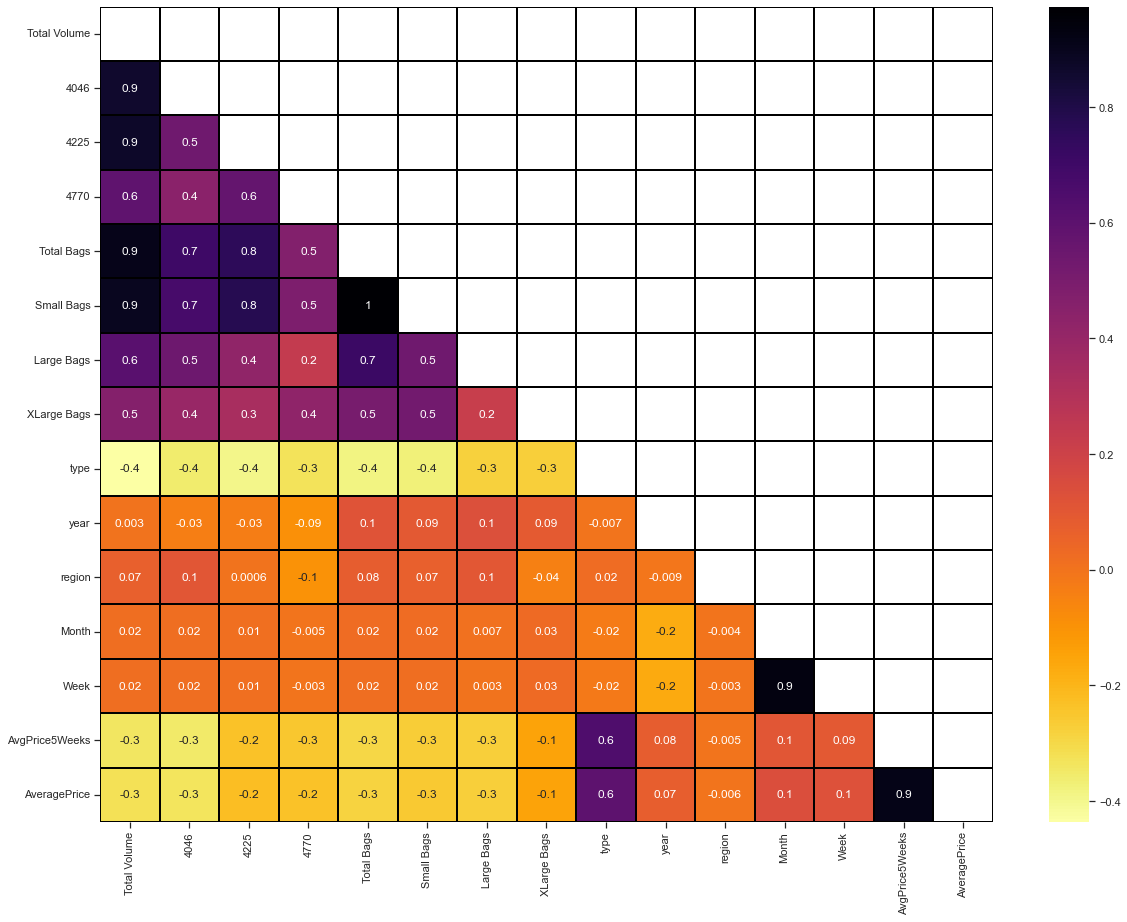

In [105]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df1.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

Week and month are highly correlated,Total volume is highly correlated to many features

### Splitting dataset

In [106]:
x=df1.drop('AveragePrice',axis=1)
y=df1.AveragePrice

In [107]:
df1.head()

Total Volume     4046       4225   4770  Total Bags  Small Bags  \
4      51039.60   941.48   43838.39  75.78     6183.95     5986.26   
5      55979.78  1184.27   48067.99  43.61     6683.91     6556.47   
6      83453.76  1368.92   73672.72  93.26     8318.86     8196.81   
7     109428.33   703.75  101815.36  80.00     6829.22     6266.85   
8      99811.42  1022.15   87315.57  85.34    11388.36    11104.53   

   Large Bags  XLarge Bags  type  year  region  Month  Week  AvgPrice5Weeks  \
4      197.69          0.0     0  2015       0     11    48           1.194   
5      127.44          0.0     0  2015       0     11    47           1.180   
6      122.05          0.0     0  2015       0     11    46           1.108   
7      562.37          0.0     0  2015       0     11    45           1.118   
8      283.83          0.0     0  2015       0     11    44           1.106   

   AveragePrice  
4          1.28  
5          1.26  
6          0.99  
7          0.98  
8          1.02

## Treating skewness
### Power Transform

In [108]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [109]:
x= pd.DataFrame(x,columns=['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
        'Month','Week','AvgPrice5Weeks'])

In [110]:
x = x.reset_index(drop=True)

In [111]:
y = y.reset_index(drop=True)

In [112]:
df2 = pd.concat([x, y], axis=1)

In [113]:
df2.shape

(16641, 15)

In [114]:
df2.skew()

Total Volume     -0.026578
4046             -0.050475
4225             -0.060577
4770              0.018768
Total Bags       -0.033438
Small Bags       -0.039221
Large Bags       -0.120118
XLarge Bags       0.888837
type             -0.043642
year              0.000000
region           -0.258054
Month            -0.146759
Week             -0.216013
AvgPrice5Weeks   -0.010591
AveragePrice      0.252938
dtype: float64

In [115]:
x=df2.drop('AveragePrice',axis=1)
y=df2.AveragePrice

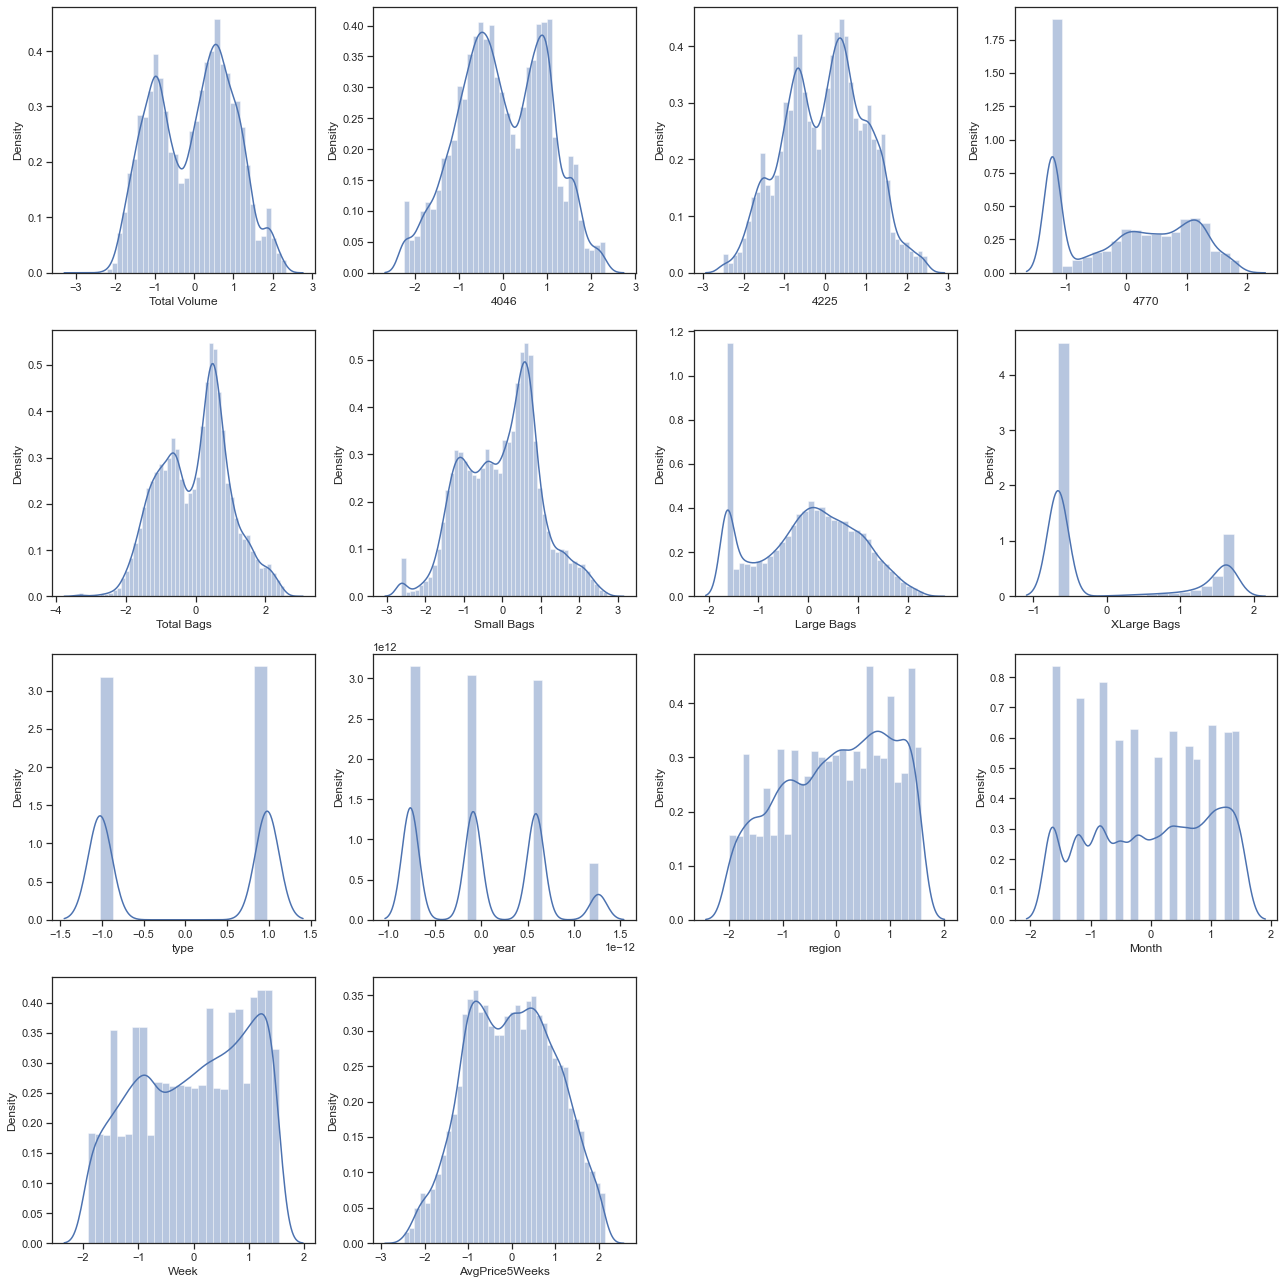

In [116]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## Removing collinearity

In [117]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values        Features
0    56.271782    Total Volume
1     7.188378            4046
2    12.237271            4225
3     3.733233            4770
4    36.288707      Total Bags
5    17.189105      Small Bags
6     3.451098      Large Bags
7     1.972057     XLarge Bags
8     4.402251            type
9     1.528655            year
10    1.089577          region
11    8.127680           Month
12    7.991287            Week
13    2.243986  AvgPrice5Weeks

VIF value is higher than accepted range which is 5

In [118]:
x.drop('Total Volume',axis=1, inplace=True)

Dropping the Total volume as it is having highest VIF value to reduce collienearity.

In [120]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values        Features
0     3.620523            4046
1     4.470286            4225
2     3.723635            4770
3    26.018155      Total Bags
4    17.186704      Small Bags
5     3.402198      Large Bags
6     1.964181     XLarge Bags
7     4.275623            type
8     1.527762            year
9     1.080160          region
10    8.127642           Month
11    7.991123            Week
12    2.223822  AvgPrice5Weeks

VIF value is higher than accepted range which is 5

In [121]:
x.drop('Total Bags',axis=1, inplace=True)

Dropping the Total Bags as it is having highest VIF value to reduce collienearity.

In [122]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values        Features
0     3.612311            4046
1     4.189182            4225
2     3.723295            4770
3     4.017720      Small Bags
4     1.953920      Large Bags
5     1.964181     XLarge Bags
6     4.253048            type
7     1.478416            year
8     1.079725          region
9     8.115933           Month
10    7.990730            Week
11    2.128340  AvgPrice5Weeks

Now VIF is in acceptable range less than 5

In [124]:
x.shape[1]

12

## Feature selection

In [125]:
from sklearn.feature_selection import SelectKBest,f_classif

In [126]:
best_features = SelectKBest(score_func=f_classif,k=10) # run multiple time and find the best

fit=best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(12,'Score')) # print 25 best features

      Feature_Name       Score
11  AvgPrice5Weeks  422.620213
6             type   50.045670
0             4046   36.664199
2             4770   27.050996
3       Small Bags   23.849204
4       Large Bags   22.679810
1             4225   21.540515
5      XLarge Bags   14.456211
7             year    3.140810
9            Month    2.694828
10            Week    2.444967
8           region    1.077232


In [127]:
x.drop(['Month','Week','region','year'],inplace=True,axis=1)
x.shape

(16641, 8)

# Model building

In [128]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

## Finding the best random state

In [129]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.8480268260100952 at random_state 95


## Train test split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_rs)

## Models

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [134]:
training_r2_score = []
testing_r2_score = []

In [135]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [136]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 83.051299514688
R2_Score of LinearRegression() model on Testing Data is: 84.80268260100952

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 0.0991934984377551
Mean Square Error of LinearRegression() model is: 0.019777558321108796
Squarroot Mean Square Error  LinearRegression() model is: 0.14063270715274168

------------------------------------------------------------------------


In [137]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [138]:
alpha=lasscv.alpha_
alpha

0.00032334529906803276

In [139]:
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=0.00032334529906803276) model on Training Data is: 83.04955483817982
R2_Score of Lasso(alpha=0.00032334529906803276) model on Testing Data is: 84.80346803674672

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.00032334529906803276) model is: 0.09916077381534333
Mean Square Error of Lasso(alpha=0.00032334529906803276) model is: 0.019776536166955388
Squarroot Mean Square Error  Lasso(alpha=0.00032334529906803276) model is: 0.14062907297907992

------------------------------------------------------------------------


In [140]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [141]:
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.09099999999999998) model on Training Data is: 83.05129950570785
R2_Score of Ridge(alpha=0.09099999999999998) model on Testing Data is: 84.80267688045977

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.09099999999999998) model is: 0.09919358116897461
Mean Square Error of Ridge(alpha=0.09099999999999998) model is: 0.01977756576574546
Squarroot Mean Square Error  Ridge(alpha=0.09099999999999998) model is: 0.14063273362110779

------------------------------------------------------------------------


In [142]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 86.39567473853573
R2_Score of SVR() model on Testing Data is: 87.13327284287375

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 0.09284538924601067
Mean Square Error of SVR() model is: 0.01674456353519093
Squarroot Mean Square Error  SVR() model is: 0.12940078645507117

------------------------------------------------------------------------


In [143]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 97.78990396647066
R2_Score of RandomForestRegressor() model on Testing Data is: 85.97866191040463

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 0.09447342279190868
Mean Square Error of RandomForestRegressor() model is: 0.018247156687362306
Squarroot Mean Square Error  RandomForestRegressor() model is: 0.1350820368789363

------------------------------------------------------------------------


In [144]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 85.84812900390206
R2_Score of GradientBoostingRegressor() model on Testing Data is: 86.03992281368991

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 0.09545510250431655
Mean Square Error of GradientBoostingRegressor() model is: 0.018167432677149226
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 0.13478661905823303

------------------------------------------------------------------------


In [145]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 71.84927313319957

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 0.13453635089124774
Mean Square Error of DecisionTreeRegressor() model is: 0.03663492890046064
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 0.19140253107119728

------------------------------------------------------------------------


In [146]:
model_prediction(KNeighborsRegressor())

R2_Score of KNeighborsRegressor() model on Training Data is: 90.96546903959117
R2_Score of KNeighborsRegressor() model on Testing Data is: 86.95711603254469

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor() model is: 0.09106108551972762
Mean Square Error of KNeighborsRegressor() model is: 0.01697381133587022
Squarroot Mean Square Error  KNeighborsRegressor() model is: 0.1302835804538324

------------------------------------------------------------------------


In [147]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 80.1271337400879
R2_Score of AdaBoostRegressor() model on Testing Data is: 81.21080143687855

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 0.1179555062565864
Mean Square Error of AdaBoostRegressor() model is: 0.024451977979594787
Squarroot Mean Square Error  AdaBoostRegressor() model is: 0.1563712824645075

------------------------------------------------------------------------


In [148]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 94.32366568089677
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

## Analysis the performance of model

In [150]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','AdaBoostRegressor','XGBRegressor']

In [151]:
df4 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df4

Algorithms  Training R2 Score  Testing R2 Score
0           LinearRegression          83.051300         84.802683
1                      Lasso          83.049555         84.803468
2                      Ridge          83.051300         84.802677
3                        SVR          86.395675         87.133273
4      RandomForestRegressor          97.789904         85.978662
5  GradientBoostingRegressor          85.848129         86.039923
6      DecisionTreeRegressor         100.000000         71.849273
7        KNeighborsRegressor          90.965469         86.957116
8          AdaBoostRegressor          80.127134         81.210801
9               XGBRegressor          94.323666         87.133083

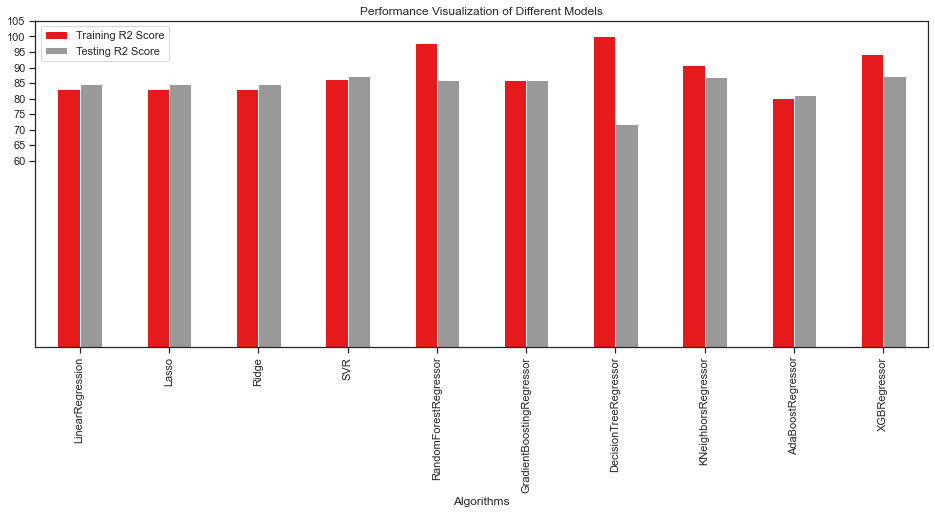

In [152]:
df4.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

## Cross validation

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
num_folds_range = range(2,20)

model = LinearRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x, y, cv=num_folds, scoring='neg_mean_squared_error')  # or 'r2' for coefficient of determination
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }
    
df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

        mean       std
2  -0.331579  0.301320
3  -0.021928  0.008259
4  -0.021685  0.008339
5  -0.021495  0.008498
6  -0.021433  0.008677
7  -0.021358  0.008648
8  -0.021303  0.008973
9  -0.021248  0.009011
10 -0.021241  0.008949
11 -0.021238  0.009006
12 -0.021212  0.008955
13 -0.021200  0.009228
14 -0.021205  0.009178
15 -0.021187  0.009134
16 -0.021178  0.009241
17 -0.021171  0.009368
18 -0.021167  0.009278
19 -0.021169  0.009324


In [158]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.77377098 0.82070203 0.69562019]
0.7633643976956505
Differnet between Accuracy score and cross validation score is-  0.08466242831444482


In [159]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[-2.73774783 -0.12514122 -0.6902631 ]
-1.1843840520843776
Differnet between Accuracy score and cross validation score is-  2.032418732451845


In [160]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.77376042 0.820703   0.69560761]
0.7633570098173541
Differnet between Accuracy score and cross validation score is-  0.0846697589872436


In [161]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[0.74795286 0.81842815 0.56500409]
0.7104617015601159
Differnet between Accuracy score and cross validation score is-  0.16087102686862165


In [162]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.74042093 0.80464715 0.66336292]
0.7361436644311841
Differnet between Accuracy score and cross validation score is-  0.12364295467286224


In [163]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y, cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.7897893  0.81881424 0.69519457]
0.767932703756126
Differnet between Accuracy score and cross validation score is-  0.09246652438077319


In [164]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y, cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.25344558 0.54195481 0.3901053 ]
0.395168562538122
Differnet between Accuracy score and cross validation score is-  0.32332416879387377


In [165]:
# checking cv score for logistic Regression
score = cross_val_score(KNeighborsRegressor(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.5834514  0.74579844 0.56721432]
0.6321547207357522
Differnet between Accuracy score and cross validation score is-  0.23741643958969472


In [166]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.52486367 0.76129894 0.64762374]
0.6445954509938477
Differnet between Accuracy score and cross validation score is-  0.1675125633749378


In [167]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x,y,cv=3)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[9]/100)- score.mean())

[0.70788937 0.7842596  0.60740115]
0.6998500406975895
Differnet between Accuracy score and cross validation score is-  0.17148078431520763


Ridge ,GradientBoostingRegressor and Lasso are best model 

# Hyperperameter tuning

In [168]:
from sklearn.model_selection import GridSearchCV

## Lasso

In [169]:
model1=Lasso()

In [170]:
param_grid={'alpha':[0.005,0.01,0.02],
           'max_iter':[500,750,1000],
           'selection':['cyclic', 'random'],
           'random_state':[30,40,50]}

In [171]:
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.01, 0.02],
                         'max_iter': [500, 750, 1000],
                         'random_state': [30, 40, 50],
                         'selection': ['cyclic', 'random']})

In [172]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'alpha': 0.005, 'max_iter': 500, 'random_state': 40, 'selection': 'random'}

In [173]:
model_prediction(Lasso(alpha= 0.005, max_iter= 500, random_state= 30, selection= 'random'))

R2_Score of Lasso(alpha=0.005, max_iter=500, random_state=30, selection='random') model on Training Data is: 82.96921110104563
R2_Score of Lasso(alpha=0.005, max_iter=500, random_state=30, selection='random') model on Testing Data is: 84.75483912198428

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=0.005, max_iter=500, random_state=30, selection='random') model is: 0.09906518267377976
Mean Square Error of Lasso(alpha=0.005, max_iter=500, random_state=30, selection='random') model is: 0.019839821098930965
Squarroot Mean Square Error  Lasso(alpha=0.005, max_iter=500, random_state=30, selection='random') model is: 0.14085389983571972

------------------------------------------------------------------------


## Ridge

In [504]:
model2=Ridge()

In [505]:
param_grid={'alpha':[0.005,0.01,0.02],
           'max_iter':[500,750,1000],
           'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
           'random_state':[30,40,50]}

In [508]:
grid_search = GridSearchCV(model2, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.005, 0.01, 0.02],
                         'max_iter': [500, 750, 1000],
                         'random_state': [30, 40, 50],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [509]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'alpha': 0.005, 'max_iter': 500, 'random_state': 30, 'solver': 'sag'}

In [510]:
model_prediction(Ridge(alpha= 0.005, max_iter= 500, random_state= 30, solver = 'saga'))

R2_Score of Ridge(alpha=0.005, max_iter=500, random_state=30, solver='saga') model on Training Data is: 84.12718486592998
R2_Score of Ridge(alpha=0.005, max_iter=500, random_state=30, solver='saga') model on Testing Data is: 85.70962919884582

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.005, max_iter=500, random_state=30, solver='saga') model is: 0.09692432542917642
Mean Square Error of Ridge(alpha=0.005, max_iter=500, random_state=30, solver='saga') model is: 0.018597271776982918
Squarroot Mean Square Error  Ridge(alpha=0.005, max_iter=500, random_state=30, solver='saga') model is: 0.1363718144521914

------------------------------------------------------------------------


## GradientBoostingRegressor

In [518]:
model3=GradientBoostingRegressor()

In [519]:
param_grid={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse', 'squared_error'],
           'learning_rate':[.005,.01,.02,.04],
           'n_estimators':[50,100,150]}

In [520]:
grid_search = GridSearchCV(model3, param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.005, 0.01, 0.02, 0.04],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150]})

In [521]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'learning_rate': 0.04,
 'loss': 'squared_error',
 'n_estimators': 150}

In [523]:
model_prediction(GradientBoostingRegressor(criterion= 'squared_error', learning_rate= 0.04,loss= 'squared_error', n_estimators= 150))

R2_Score of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150) model on Training Data is: 85.60005935431269
R2_Score of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150) model on Testing Data is: 86.17140020317858

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150) model is: 0.09521295932583346
Mean Square Error of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150) model is: 0.017996329996968836
Squarroot Mean Square Error  GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150) model is: 0.1341504006589948

----------------------------------------------------------------

In [525]:
m=GradientBoostingRegressor(criterion= 'squared_error', learning_rate= 0.04,loss= 'squared_error', n_estimators= 150)
m.fit(x_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.04,
                          n_estimators=150)

## Saving model

In [526]:
import pickle
filename='AvacadoPrice.pkl'
pickle.dump(m,open(filename,'wb'))#saved model

## Loading model

In [527]:
loaded_model=pickle.load(open('AvacadoPrice.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.17140020317859


In [528]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0         1         2         3         4         5     \
Predicted  1.10199  0.944257  1.344561  1.101639  1.119373  1.164061   
Original   1.12000  1.060000  1.200000  1.170000  1.070000  0.840000   

               6         7         8         9     ...     4983     4984  \
Predicted  1.622197  0.908013  1.046464  1.293511  ...  1.88388  1.09027   
Original   1.580000  0.880000  1.020000  1.260000  ...  1.80000  1.11000   

               4985      4986      4987      4988      4989     4990  \
Predicted  1.139938  1.565844  1.519857  1.023566  1.578141  1.44805   
Original   1.010000  1.590000  1.500000  1.390000  1.680000  1.45000   

               4991      4992  
Predicted  0.929068  1.647782  
Original   0.910000  1.700000  

[2 rows x 4993 columns]

# Building classification model

In [175]:
df6=pd.read_csv("avocado.csv")
df6.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

## Feature Engnineering

In [176]:
# dropping the unnamed callem as it is 0-52 index repeating and not provide any information
df6.drop('Unnamed: 0',axis=1,inplace=True)


In [177]:
# Converting data type from object to datefromate
df6['Date'] = pd.to_datetime(df6['Date'])

In [178]:
# Checking the datatype
df6['Date'].dtype

dtype('<M8[ns]')

In [179]:
# Making new date and month column 
df6['Month']=df6['Date'].dt.month
df6['Week'] = df6['Date'].dt.isocalendar().week
df6.shape

(18249, 15)

In [180]:
df6['Week'] = df6['Week'].astype('int64')

In [181]:
# Droping the original Date column as we already have day month and year
df6.drop('Date',axis=1, inplace=True)

In [182]:
df6.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  \
0     8603.62       93.25          0.0  conventional  2015  Albany     12   
1     9408.07       97.49          0.0  conventional  2015  Albany     12   
2     8042.21      103.14          0.0  conventional  2015  Albany     12   
3     5677.40      133.76          0.0  conventional  2015  Albany     12   
4     5986.26      197.69          0.0  conventional  2015  Albany     11   

   Week  
0    52  
1    51  
2    50  
3    49  
4    48

### Encoding

In [183]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [184]:
df3=lab_enc.fit_transform(df6['region'])
pd.Series(df3)
df6['All_region']=df3

In [185]:
df4=lab_enc.fit_transform(df6['type'])
pd.Series(df4)
df6['type']=df4

In [186]:
df6.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Week  \
0     8603.62       93.25          0.0     0  2015  Albany     12    52   
1     9408.07       97.49          0.0     0  2015  Albany     12    51   
2     8042.21      103.14          0.0     0  2015  Albany     12    50   
3     5677.40      133.76          0.0     0  2015  Albany     12    49   
4     5986.26      197.69          0.0     0  2015  Albany     11    48   

   All_region  
0           0  
1           0  
2           0  
3           0  
4           0

**Converting label from 54 to 2 class according to its geographical location in east and west**

In [187]:
def classify_region(region):
    east_regions = ['Albany', 'BaltimoreWashington', 'Boston', 'BuffaloRochester', 'HarrisburgScranton',
                    'HartfordSpringfield', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Philadelphia',
                    'Pittsburgh', 'RichmondNorfolk', 'Syracuse']

    if region in east_regions:
        return 'East'
    else:
        return 'West'

# reasigning the region with updated values
df6['region'] = df6['region'].apply(classify_region)


In [188]:
df3=lab_enc.fit_transform(df6['region'])
pd.Series(df3)
df6['region']=df3

In [189]:
x=df6.drop('region', axis=1)
y= df6.region

In [190]:
df6.region.value_counts()

1    13855
0     4394
Name: region, dtype: int64

Dataset is imbalance we will fix it later.

## Treating outliers

In [191]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(18249, 14)

In [192]:
Threshold = 2
outlier_indices = np.where(z > 2)[0]

In [193]:
x1 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(x1.shape)

(18249, 14)
(16640, 14)


In [194]:
percentagedataloss=(x.shape[0]-x1.shape[0])*100/x.shape[0]
percentagedataloss

8.816921475149323

In [195]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)

(16640,)


In [196]:
x=x1

In [197]:
df7=pd.concat([x,y],axis=1)
df7.shape

(16640, 15)

In [198]:
df7.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  Month  Week  All_region  \
0     8603.62       93.25          0.0     0  2015     12    52           0   
1     9408.07       97.49          0.0     0  2015     12    51           0   
2     8042.21      103.14          0.0     0  2015     12    50           0   
3     5677.40      133.76          0.0     0  2015     12    49           0   
4     5986.26      197.69          0.0     0  2015     11    48           0   

   region  
0       0  
1       0  
2       0  
3       0  
4       0

## Skewness

In [199]:
df7.skew()

AveragePrice    0.157549
Total Volume    3.964525
4046            5.117721
4225            4.650204
4770            4.988144
Total Bags      3.934680
Small Bags      4.210492
Large Bags      4.522757
XLarge Bags     6.036502
type           -0.041599
year            0.255009
Month           0.111723
Week            0.111404
All_region      0.022074
region         -1.167441
dtype: float64

## Correlation

In [200]:
# checking the correlationbetween features and the target.
cor=df7.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.325636 -0.336509 -0.227345 -0.241233   
Total Volume     -0.325636      1.000000  0.858508  0.872290  0.590650   
4046             -0.336509      0.858508  1.000000  0.537032  0.440385   
4225             -0.227345      0.872290  0.537032  1.000000  0.574135   
4770             -0.241233      0.590650  0.440385  0.574135  1.000000   
Total Bags       -0.286933      0.908772  0.703283  0.756093  0.470342   
Small Bags       -0.256109      0.896174  0.670735  0.775812  0.486184   
Large Bags       -0.275419      0.614195  0.542217  0.422701  0.237765   
XLarge Bags      -0.146703      0.466301  0.395518  0.337170  0.428379   
type              0.604336     -0.435869 -0.358663 -0.397414 -0.331322   
year              0.077062      0.002529 -0.035287 -0.029257 -0.094313   
Month             0.134666      0.017367  0.015765  0.011231 -0.005529   
Week              0.120060      0.017056  0.014304  0.013654 -0.003155   
All_region       -0.010903      0.066668  0.109348  0.001280 -0.097761   
region           -0.206624      0.067473  0.182616 -0.084030  0.122562   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.286933   -0.256109   -0.275419    -0.146703  0.604336   
Total Volume    0.908772    0.896174    0.614195     0.466301 -0.435869   
4046            0.703283    0.670735    0.542217     0.395518 -0.358663   
4225            0.756093    0.775812    0.422701     0.337170 -0.397414   
4770            0.470342    0.486184    0.237765     0.428379 -0.331322   
Total Bags      1.000000    0.973821    0.713331     0.511465 -0.385288   
Small Bags      0.973821    1.000000    0.535850     0.528854 -0.371576   
Large Bags      0.713331    0.535850    1.000000     0.223028 -0.280770   
XLarge Bags     0.511465    0.528854    0.223028     1.000000 -0.274322   
type           -0.385288   -0.371576   -0.280770    -0.274322  1.000000   
year            0.114455    0.093778    0.133161     0.091016 -0.004795   
Month           0.022076    0.023462    0.008434     0.031959 -0.025084   
Week            0.019387    0.021330    0.005204     0.028083 -0.023772   
All_region      0.081985    0.067400    0.101748    -0.042278  0.021087   
region          0.071403    0.035019    0.152376     0.086565  0.024192   

                  year     Month      Week  All_region    region  
AveragePrice  0.077062  0.134666  0.120060   -0.010903 -0.206624  
Total Volume  0.002529  0.017367  0.017056    0.066668  0.067473  
4046         -0.035287  0.015765  0.014304    0.109348  0.182616  
4225         -0.029257  0.011231  0.013654    0.001280 -0.084030  
4770         -0.094313 -0.005529 -0.003155   -0.097761  0.122562  
Total Bags    0.114455  0.022076  0.019387    0.081985  0.071403  
Small Bags    0.093778  0.023462  0.021330    0.067400  0.035019  
Large Bags    0.133161  0.008434  0.005204    0.101748  0.152376  
XLarge Bags   0.091016  0.031959  0.028083   -0.042278  0.086565  
type         -0.004795 -0.025084 -0.023772    0.021087  0.024192  
year          1.000000 -0.176085 -0.170043   -0.010142 -0.013878  
Month        -0.176085  1.000000  0.934384   -0.004420 -0.000140  
Week         -0.170043  0.934384  1.000000   -0.003878 -0.000216  
All_region   -0.010142 -0.004420 -0.003878    1.000000  0.156725  
region       -0.013878 -0.000140 -0.000216    0.156725  1.000000

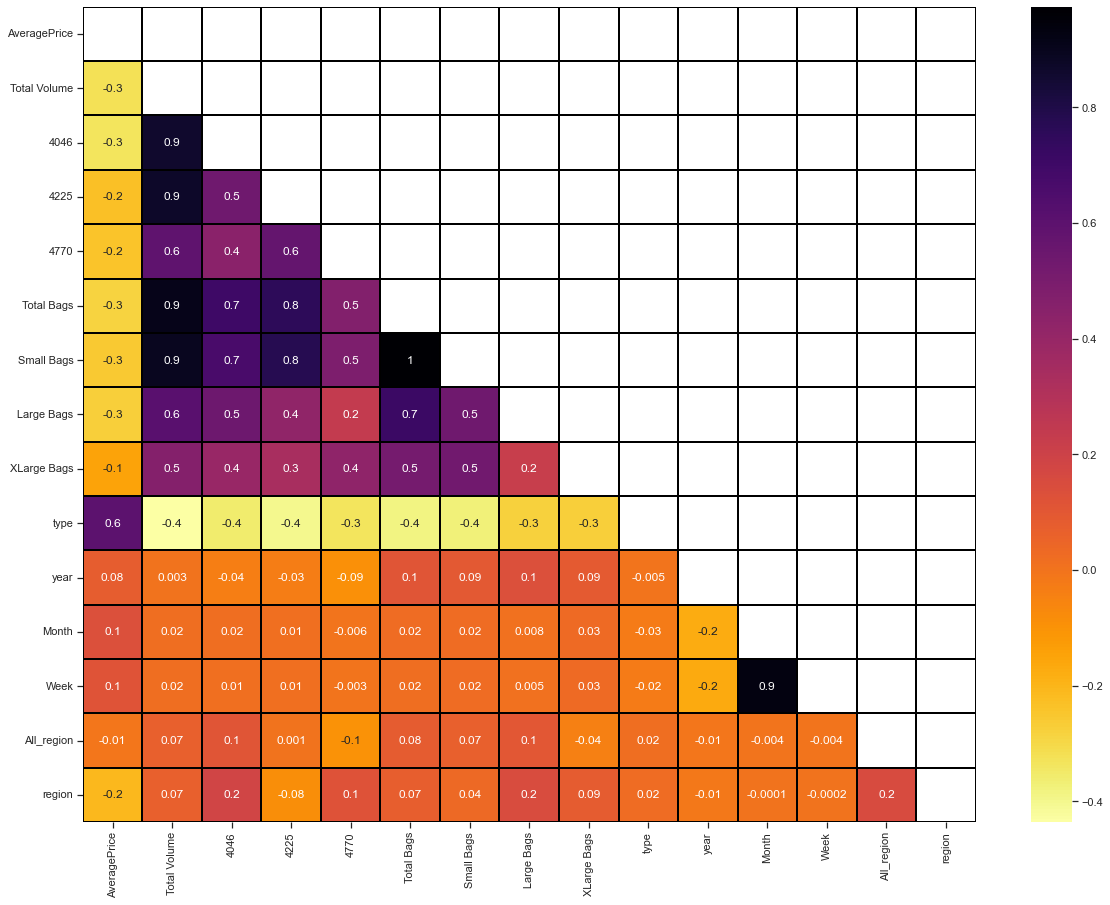

In [201]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df7.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df7.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

We can see from the above graph the Week and Month are highly correlated

In [202]:
x=df7.drop('region',axis=1)
y=df7.region

## Removing skewness

In [203]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [204]:
x= pd.DataFrame(x,columns=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
        'Month','Week','All_region'])

In [205]:
x = x.reset_index(drop=True)

y = y.reset_index(drop=True)

In [206]:
df8 = pd.concat([x, y], axis=1)
df8.shape

(16640, 15)

In [207]:
df8.skew()

AveragePrice   -0.013800
Total Volume   -0.026514
4046           -0.050467
4225           -0.060689
4770            0.018249
Total Bags     -0.032635
Small Bags     -0.038114
Large Bags     -0.119504
XLarge Bags     0.889611
type           -0.041599
year            0.000000
Month          -0.145788
Week           -0.214710
All_region     -0.258064
region         -1.167441
dtype: float64

## Splitting label and feature

In [208]:
x=df8.drop('region',axis=1)
y=df8.region

### checking the distribution

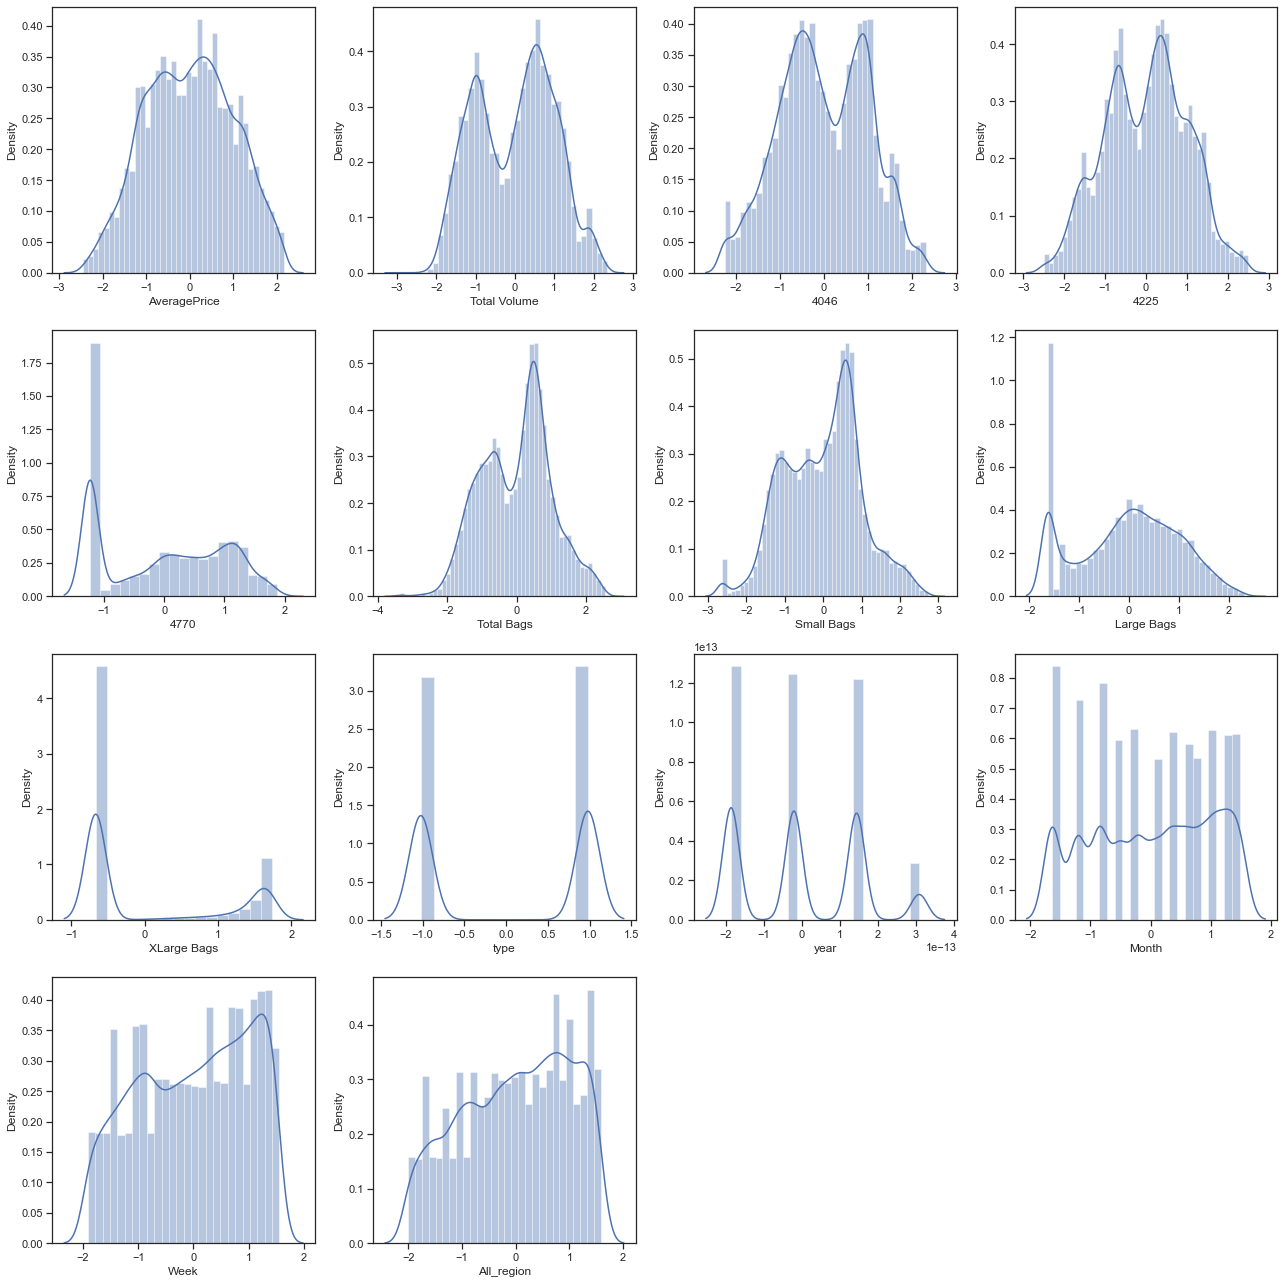

In [209]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Distribution is convert to  normal distribution

# Feature selection

In [210]:
from sklearn.feature_selection import SelectKBest,f_classif

In [211]:
best_features = SelectKBest(score_func=f_classif,k=10) # run multiple time and find the best

fit=best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(14,'Score')) # print 25 best features

    Feature_Name        Score
2           4046  1389.848463
7     Large Bags   898.591272
0   AveragePrice   777.511613
13    All_region   496.445802
8    XLarge Bags   218.076083
1   Total Volume    87.780267
6     Small Bags    29.681332
4           4770    19.992615
5     Total Bags    11.778571
9           type     9.742771
10          year     3.205403
3           4225     0.497954
11         Month     0.000041
12          Week     0.000003


In [212]:
x.drop(['4225','Month','Week'],inplace=True,axis=1)

These feature do not contribute much as score suggest

In [213]:
x.shape

(16640, 11)

# VIF
## Treating the collinearity

In [214]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values      Features
0     1.881790  AveragePrice
1    20.086702  Total Volume
2     5.292695          4046
3     3.579722          4770
4    33.273795    Total Bags
5    17.463082    Small Bags
6     3.359471    Large Bags
7     1.952326   XLarge Bags
8     4.125112          type
9     1.392437          year
10    1.088701    All_region

In [215]:
x.drop('Total Bags',axis=1, inplace=True)

Droping the highest VIF value

In [216]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values      Features
0    1.777456  AveragePrice
1   15.042776  Total Volume
2    4.999985          4046
3    3.574470          4770
4    6.467566    Small Bags
5    2.101786    Large Bags
6    1.951223   XLarge Bags
7    4.023368          type
8    1.336733          year
9    1.084511    All_region

In [217]:
x.drop('Total Volume',axis=1, inplace=True)

In [218]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

VIF values      Features
0    1.776365  AveragePrice
1    3.522704          4046
2    3.449974          4770
3    3.543572    Small Bags
4    1.776993    Large Bags
5    1.948510   XLarge Bags
6    3.803431          type
7    1.326808          year
8    1.074336    All_region

## Oversampeling

In [219]:
y.value_counts()

1    12514
0     4126
Name: region, dtype: int64

In [220]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x,y=SM.fit_resample(x,y)

In [221]:
y.value_counts()

0    12514
1    12514
Name: region, dtype: int64

In [222]:
x.shape

(25028, 9)

# Model building

## best random state

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print("Best accuracy is",maxAccu,"at random_state",maxRS)
   

Best accuracy is 0.8162205353575709 at random_state 25


## train test split

In [224]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [225]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [226]:
training_score = []
testing_score = []

In [227]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 80.30138706547177
Accuracy_Score of LogisticRegression() model on Testing Data is: 81.62205353575709

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8057173107464267
Recall Score of LogisticRegression() model is: 0.8249322493224932
F1 Score of LogisticRegression() model is: 0.8152115693626137

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


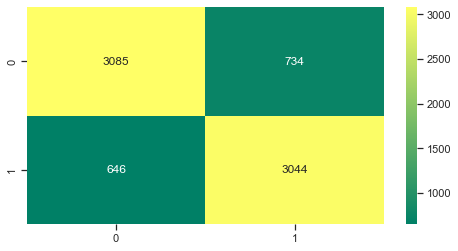

In [228]:
model_prediction(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 93.32724470574804
Accuracy_Score of SVC() model on Testing Data is: 93.66094020508723

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.9441680486456606
Recall Score of SVC() model is: 0.9257452574525745
F1 Score of SVC() model is: 0.9348659003831418

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


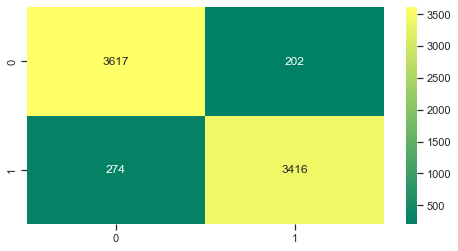

In [229]:
model_prediction(SVC())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 99.53389266213877

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.9959294436906377
Recall Score of DecisionTreeClassifier() model is: 0.994579945799458
F1 Score of DecisionTreeClassifier() model is: 0.9952542372881356

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


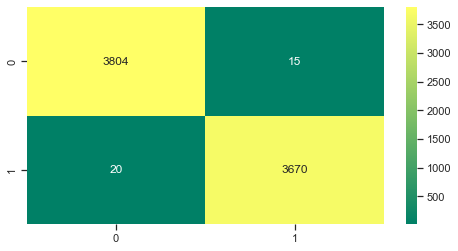

In [230]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 99.84019176987616

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9967585089141004
Recall Score of RandomForestClassifier() model is: 1.0
F1 Score of RandomForestClassifier() model is: 0.9983766233766234

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


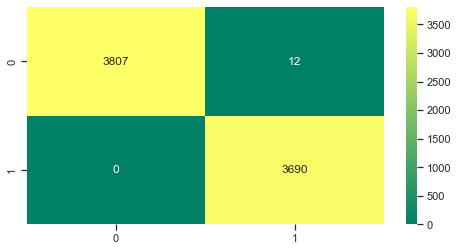

In [231]:
model_prediction(RandomForestClassifier())

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 99.90677853242775

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.9981065728969435
Recall Score of ExtraTreesClassifier() model is: 1.0
F1 Score of ExtraTreesClassifier() model is: 0.9990523893326113

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


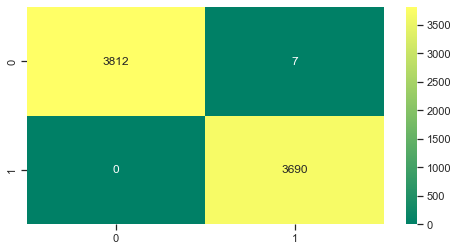

In [232]:
model_prediction(ExtraTreesClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 98.00787716193847
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 97.92249300838994

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.9812091503267973
Recall Score of AdaBoostClassifier() model is: 0.9764227642276423
F1 Score of AdaBoostClassifier() model is: 0.9788101059494703

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


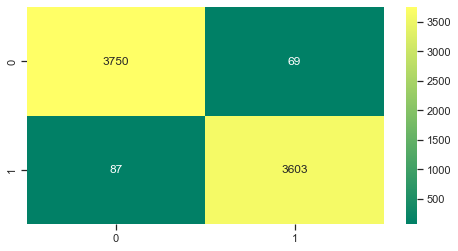

In [233]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 99.89725440949826
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 99.86682647489678

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9983748645720477
Recall Score of GradientBoostingClassifier() model is: 0.9989159891598915
F1 Score of GradientBoostingClassifier() model is: 0.9986453535627201

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


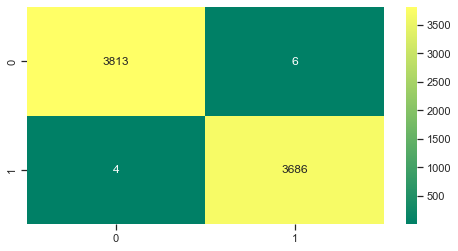

In [234]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_round

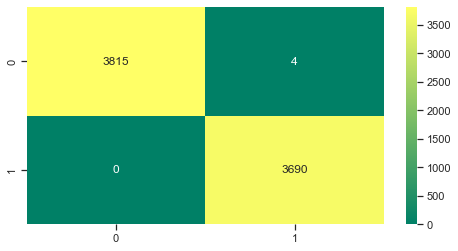

In [235]:
model_prediction(XGBClassifier())

## Models analysis

In [236]:
models = ["Logistic Regression","SVM","Decision Tree","Random Forest","Extra Tree","Ada Boost",
          "Gradient Boost","XGBoost"]

In [237]:
df9 = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [238]:
df9

Algorithms  Training Score  Testing Score
0  Logistic Regression       80.301387      81.622054
1                  SVM       93.327245      93.660940
2        Decision Tree      100.000000      99.533893
3        Random Forest      100.000000      99.840192
4           Extra Tree      100.000000      99.906779
5            Ada Boost       98.007877      97.922493
6       Gradient Boost       99.897254      99.866826
7              XGBoost      100.000000      99.946731

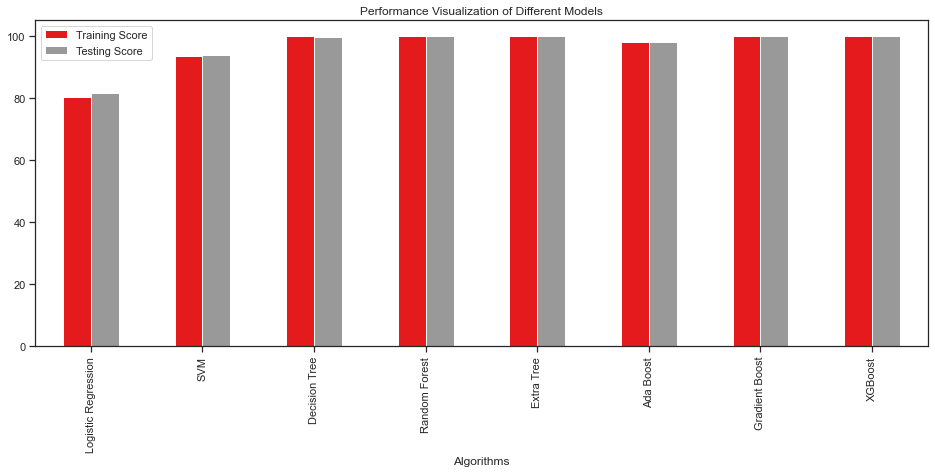

In [239]:
df9.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Cross validation

In [240]:
from sklearn.model_selection import cross_val_score

### Finding the best cv value

In [241]:
num_folds_range = range(2, 20)

model = LogisticRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x, y, cv=num_folds, scoring='accuracy')  # or other classification scoring metrics
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }

df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

        mean       std
2   0.479423  0.047187
3   0.721550  0.068197
4   0.753956  0.053967
5   0.764742  0.069471
6   0.767422  0.062108
7   0.774893  0.056521
8   0.781164  0.058722
9   0.781921  0.050354
10  0.780399  0.064163
11  0.780525  0.067542
12  0.783998  0.057090
13  0.784041  0.057430
14  0.783716  0.057066
15  0.787914  0.056392
16  0.787195  0.063130
17  0.787275  0.069986
18  0.787998  0.053343
19  0.789595  0.063166


In [251]:
# checking cv score for logistic Regression
score = cross_val_score(LogisticRegression(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[0]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[0]/100)- score.mean())

[0.84322186 0.75512406 0.74721323 0.78892485 0.83207479 0.8130169
 0.8360302  0.72779576 0.69388489]
0.7819207273519552
0.8162205353575709
Differnet between Accuracy score and cross validation score is-  0.03429980800561572


In [252]:
# checking cv score for SVC
score = cross_val_score(SVC(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[1]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[1]/100)- score.mean())

[0.94893923 0.91370011 0.86443725 0.89967638 0.94354549 0.89859763
 0.91765552 0.87162891 0.81079137]
0.8965524308349077
0.9366094020508723
Differnet between Accuracy score and cross validation score is-  0.04005697121596463


In [244]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[2]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[2]/100)- score.mean())

[0.98338525 0.98598131 0.9953271  0.97974026 0.98337662 0.98441558
 0.99012987 0.99324675 0.99428571 0.99428571 0.99688312 0.99688312
 0.97506494]
0.9886927195338411
0.9953389266213877
Differnet between Accuracy score and cross validation score is-  0.006646207087546596


In [245]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RandomForestClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[3]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[3]/100)- score.mean())

[0.99896158 0.99376947 0.99740395 0.99532468 0.99688312 0.99844156
 1.         0.99844156 0.99532468 0.99896104 0.99896104 0.99532468
 0.99480519]
0.9971232713288786
0.9984019176987615
Differnet between Accuracy score and cross validation score is-  0.001278646369882952


In [246]:
# checking cv score for ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[4]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[4]/100)- score.mean())

[1.         0.99584631 0.9953271  0.99532468 0.98753247 0.99688312
 0.99948052 0.9838961  0.99532468 0.99948052 0.99948052 0.99168831
 0.99688312]
0.9951651878754683
0.9990677853242775
Differnet between Accuracy score and cross validation score is-  0.003902597448809275


In [247]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[5]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[5]/100)- score.mean())

[0.99844237 0.99480789 0.9953271  0.97922078 0.99688312 0.97142857
 0.98597403 0.93974026 0.99792208 0.93246753 0.97714286 0.94961039
 0.97142857]
0.9761842726328709
0.9792249300838993
Differnet between Accuracy score and cross validation score is-  0.003040657451028439


In [248]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GradientBoostingClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[6]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[6]/100)- score.mean())

[0.99376947 0.99896158 0.99948079 0.98805195 0.99896104 0.99896104
 0.99844156 0.99896104 0.9974026  0.99844156 0.99948052 0.98285714
 0.99324675]
0.9959243871393403
0.9986682647489679
Differnet between Accuracy score and cross validation score is-  0.0027438776096275763


In [249]:
# checking cv score for XGBClassifier
score = cross_val_score(XGBClassifier(),x,y,cv=9)
print(score)
print(score.mean())
print(testing_score[7]/100)
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[7]/100)- score.mean())

[1.         0.99896158 1.         0.99636364 0.99948052 0.99948052
 0.99948052 0.99948052 1.         0.99948052 1.         0.9974026
 1.        ]
0.9992408007361279
0.9994673058995872
Differnet between Accuracy score and cross validation score is-  0.00022650516345934513


Best model are XGBClassifier,GradientBoostingClassifier and  DecisionTreeClassifier

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## DecisionTreeClassifier

In [613]:
model1 = DecisionTreeClassifier()
parameters1 ={'criterion':['gini', 'entropy','log_loss'],
             'min_samples_split':[3,5,6,7,9],
             'max_features':['auto','sqrt', 'log2'],
             'random_state':[75,100,150]
             }

grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)
grid_search1.fit(x_train,y_train)
grid_search1.best_score_

0.9917588458271064

In [614]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_split': 7,
 'random_state': 75}

In [615]:
model1=DecisionTreeClassifier(criterion= 'entropy', max_features= 'auto', min_samples_split= 7, random_state= 75)

In [616]:
model1.fit(x_train,y_train)

x_test_pred1 = model1.predict(x_test)

accuracy_score(y_test,x_test_pred1)

0.9939903846153846

## GradientBoostingClassifier

In [621]:
model2 = GradientBoostingClassifier()
parameters2 ={'criterion':['friedman_mse', 'squared_error'],
             'learning_rate':[0.005,.01,.02],
             'n_estimators':[50,100,200],
             'loss':['log_loss', 'exponential']
             }

grid_search2 = GridSearchCV(model2, parameters2, cv=13, n_jobs=-1)
grid_search2.fit(x_train,y_train)
grid_search2.best_score_

0.980683379120879

In [623]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'criterion': 'friedman_mse',
 'learning_rate': 0.02,
 'loss': 'log_loss',
 'n_estimators': 200}

In [624]:
model2=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.02,loss= 'log_loss',n_estimators= 200)

In [625]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

accuracy_score(y_test,x_test_pred2)

0.9807692307692307

## XGBClassifier

In [626]:
model3=XGBClassifier()

In [627]:
parameters3 ={'booster':['gbtree', 'gblinear', 'dart'],
             'learning_rate':[0.005,.01,.02],
             'disable_default_eval_metric':[True,False],
             'max_depth':[5,6,7]
             }

grid_search3 = GridSearchCV(model3, parameters3, cv=13, n_jobs=-1)
grid_search3.fit(x_train,y_train)
grid_search3.best_score_

0.9998282967032968

In [628]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'booster': 'gbtree',
 'disable_default_eval_metric': True,
 'learning_rate': 0.01,
 'max_depth': 7}

In [629]:
model3=XGBClassifier(booster= 'gbtree',disable_default_eval_metric= True,learning_rate= 0.01,max_depth= 7)

In [630]:
model3.fit(x_train,y_train)

x_test_pred3 = model3.predict(x_test)

accuracy_score(y_test,x_test_pred3)

1.0

## AUC

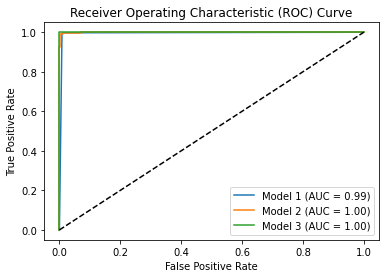

AUC Score for Model 1: 0.9928665043833337
AUC Score for Model 2: 0.9598180382621209
AUC Score for Model 3: 1.0


In [631]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# Calculate and plot ROC curve for model1
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % roc_auc1)

# Calculate and plot ROC curve for model2
y_pred_prob2 = model2.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='Model 2 (AUC = %0.2f)' % roc_auc2)

# Calculate and plot ROC curve for model3
y_pred_prob3 = model3.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Model 3 (AUC = %0.2f)' % roc_auc3)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC scores
auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
print('AUC Score for Model 1:', auc_score1)

auc_score2 = roc_auc_score(y_test, model2.predict(x_test))
print('AUC Score for Model 2:', auc_score2)

auc_score3 = roc_auc_score(y_test, model3.predict(x_test))
print('AUC Score for Model 3:', auc_score3)


## Saving the model

In [632]:
# Saving the model using .pkl
import joblib
joblib.dump(model3,"Avacado_region.pkl")

['Avacado_region.pkl']

## Loading the model

In [633]:
# Let's load the saved model and get the predictions
model=joblib.load("Avacado_region.pkl")

In [634]:
# Prediction
prediction=model.predict(x_test)

In [635]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0             0         0
1             1         1
2             0         0
3             0         0
4             1         1
...         ...       ...
4987          1         1
4988          1         1
4989          1         1
4990          0         0
4991          1         1

[4992 rows x 2 columns]